# Libraries

In [2]:
import pandas as pd
import string
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
def search(dataframe: pd.DataFrame, column: string, pattern: string, useRegex = False):
    """
    Возвращает все строки из датафрейма, столбец которых содержит слово 'word'
    :param dataframe: Датафрейм, по которому ведется поиск
    :param column: Колонка датафрейма, по которой ведется поиск
    :param pattern: Искомое слово
    :param useRegex: Если хотим использовать регулярку для поиска
    :return: Датафрейм, содержащий (в себе) слово 'word' в столбдце 'column'
    """
    ret = pd.DataFrame(columns=dataframe.columns)
    for index, row in dataframe.iterrows():
        if useRegex:
            if re.match(pattern,str(row[column])):
                ret = ret.append(row)
        else:
            if str(row[column]).__contains__(pattern):
                ret = ret.append(row)
    return ret


def specSymbolsToSpace(row: str):
    """
    Для преобразования спец. символов разделителей в пробелы
    :param row: Исходная строка
    :return: Строка с пробелами вместо спец. символов
    """
    ret = row.replace('\xa0', ' ').replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')
    ret = re.sub(' +', ' ', ret)
    ret = ret.strip()
    return ret

# Разделяем подозрительный список на настоящиих и 'ошибочных' актеров
def addToSet(_cast: set, _trueCast: set, word: str):
    if word in _cast:
        _trueCast.add(word)

#Необходим для чистки данных
def correctWithSor(line: str, separator = ','):
    """
    Удаление пробелов по краям фраз в строке, разделенных запятыми, в порядке возрастания с сортировкой
    :param line: Строка с фразами
    :param separator: Разделитель
    :return: Фразы, отсортированные в порядке возрастания
    """
    line = str(line).split(separator)
    ret = set()
    for word in line:
        word = str(word).strip()
        if word != '':
            ret.add(word)
    ret = sorted(list(ret))
    ret = ','.join(ret)
    return ret

#Для вывода красивого результата
def correctWithoutSor(line: str, separator = ','):
    """
    Удаление пробелов по краям фраз в строке, разделенных запятыми в порядке возрастания без сортировкой
    :param line: Строка с фразами
    :param separator: Разделитель
    :return: Фразы в изначальном порядке
    """
    line = line.split(separator)
    ret = set()
    for word in line:
        word = str(word).strip()
        if word != '':
            ret.add(word)
    ret = list(ret)
    ret = ','.join(ret)
    return ret

# Данные

Данный датасет содержит описательную информацию о 34,886 фильмах со всеми мира. Описание столбов дано ниже:

* Release Year - Год выпуска фильма в прокат
* Title - Название фильма
* Origin/Ethnicity - Происхождение фильма (т.е. американский, болливуд и тд.)
* Director - Режиссер(s)
* Cast - Главные актеры
* Genre - Жанр(ы) фильма
* Wiki Page - URL-адрес страницы Википедии, с которой и было взято описание фильма
* Plot - Подробное описание сюжета фильма (ВНИМАНИЕ: Может содержать спойлеры!!!)

In [5]:
data = pd.read_csv('wiki_movie_plots_deduped.csv')
print(f'Количество строк = ({data.shape[0]}), Количество столбцов = ({data.shape[1]})')
data.head()

Количество строк = (34886), Количество столбцов = (8)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


Вводим новые столбцы, которые будем очищать

In [6]:
data = data.fillna('unknown')
data['DirectorCorrected'] = data['Director'].apply(lambda x: str(x).lower()).apply(lambda x: str(x).replace(' and ', ','))
data['CastCorrected'] = data['Cast'].apply(lambda x: str(x).lower()).apply(lambda x: str(x).replace(' and ', ','))
data['GenreCorrected'] = data['Genre'].apply(lambda x: str(x).lower()).apply(lambda x: str(x).replace(' and ', ','))

In [7]:
data.describe(include='all')

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
count,34886.000000,34886,34886,34886,34886,34886,34886,34886,34886,34886,34886
unique,NaN,32432,24,12593,32183,2265,34070,33869,12564,32180,2265
top,NaN,Cinderella,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Digimon_Adventur...,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou...",unknown,unknown,unknown
freq,NaN,8,17377,1124,1422,6083,5,6,1124,1423,6083
mean,1981.314252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27.815174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1901.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1957.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Title:

1) Количество не уникальных названий = 2454. Это могут быть как повторы одного и того же фильма, так и разные фильмы с одинаковым названием. Необходимо разобраться с этим подробнее.

Director:

1) Пропущенные значения ('Unknown') в Director - 1124

Cast:

1) Пропущенные значения ('unknown') в Cast - 1423

Genre:

1) Пропущенные значения ('unknown') в Genre - 6083

# Доп. исследования:

## Жанр

In [8]:
genreSet = set()
for genre in data['Genre'].unique():
    words = set(genre.replace(',', ' ').replace('.', ' ').replace('-', ' ').replace('/', ' ').split(' '))
    genreSet.update(words)

'|'.join(genreSet)

"|eros|vampire|co|play|wuxia|b|true|goyette|sin|outlaw|suhasini|srikanth|reeler|jr|raj|colour|bhavana|yeh|satire|mythological|perodic|miniseries|bruceploitation|humour|raghava|sneha|olga|shashank|blaxploitation|dramedy|maurice|nadeem|colm|masala|story|swashbuckling|huangmei|clay|swashbuckler|sentiment|business|film|shakespearean|comedy–horror|detective|reddy|made|genre)|robitaille|kothari|double|sameera|kiran|yash|remake|buddy|prabhas|movies|shravan|fiction[not|action;|partha|chowdhury|bram|dram|classic|animation|16\xa0mm|duology|child|entertainment|yuen|and|slade|arctic|reality|rights|bajwa|cold|monster|alzheimer’s|love|jidaigeki|melodrama|chess)|silent|bio|narayan|occult|alexandre|physiological|johansson|tv|costume|mecha|narayanan|action—masala|mahesh|tokusatsu|afghan|fantay|aswani|kung|rao|harem|united|biblical|liberation|docufiction|das|knkspl|vizinczey|coming|portmanteau|mordecai|hegland|gore|piece|swimming)|sexual|adapted|mohanlal|kei|saran|mukherjee|d|surf|pic|semi|ken'ichi|bros

In [9]:
"|".join(set(data['Genre'].unique()))

"romance, drama,|drama, action, supernatural, sci-fi, spy|animated, adult|ajay, kota srinivasa rao|adventure, romantic drama|supernatural action|comedy/crime/romance|adventure/thriller|mystery/thriller|historical, thriller, drama|bio-drama|erotic musical|wwii drama|action/fantasy|allari naresh|historical epic|action / crime|mythological|period thriller|comedy western|family drama|horror romantic comedy|animated, fantasy, musical|comedy, satire|historical / war|comedy, mystery|dramedy|anime fantasy|western, serial|social/action|action / crime / adventure|comedy, parody|animation, musical, fantasy, mystery|masala|socio-fantasy, comedy|dramedy, thriller|historical epic drama|swashbuckler|historical drama|action, crime, romance|drama / suspense / horror / crime|epic, biographical, romance, drama|romance, comedy, drama|romance musical|action, adventure, epic|biogtaphy, crime, drama|sci-fi, comedy|science fiction|comedy/comedy/comedy|drama / family|suspense / drama|fantasy-children's film|sc

* Часть фильмов принадлежит сразу нескольким жанрам
* Существует много различных комбинация жанров, которые необходимо как-то стандартизировать
* Кроме самих жанров в одноименном столбце содержится всякий мусор: '(30min), 3d, usa, african etc'

## Вики-страница

In [10]:
len(data['Wiki Page']) - len(data['Wiki Page'].unique())

816

Есть повторяющиеся ссылки, значит часть записей повторяется

## Сюжет

In [11]:
len(data['Plot']) - len(data['Plot'].unique())

1017

Существуют полностью идентичные описания фильмов. Вероятнее всего, кроме существования повторяющихся ссылок, ссылки содержат и следующий недостаток: часть из них является редиректом на другие, т.к. количество уникальных описаний - 1017, а одинаковых ссылок - 816

### Уникальные символы в описании

In [12]:
%%time
symbols = set()
for plot in data['Plot']:
    symbols.update(set(plot))
' '.join(set(symbols))

CPU times: user 1.07 s, sys: 0 ns, total: 1.07 s
Wall time: 1.07 s


'ঠ \u2009 刃 響 リ 之 V カ 戯 妖 我 ! 不 b מ ו 灯 罪 偵 뽕 兄 読 ä ы 死 黄 汤 署 @ 蝶 輝 域 ా 首 м x 四 菜 Î « 네 ó け Я 業 î 髪 杰 € 駿 T ன \\ 罰 ゅ 瞳 7 ĺ 破 竹 、 笛 蓮 서 ை ै み 名 ज 擲 参 И च 安 த バ 街 フ 為 翘 ィ ュ र 風 ğ 物 木 武 ま π 碗 婆 夜 đ 竜 ʊ N 贝 K न 穂 व ゲ 害 | ो ண ா 異 Š 乱 य 耳 师 姐 丹 茶 崎 信 キ ђ 鷗 （ ほ 瀬 ギ 讃 \' 澎 Ț こ 二 条 ā R 谷 ½ の 完 ÷ 郎 ஆ ₤ 牢 テ ⁄ 望 池 ț ě 徹 р + 逆 ニ 中 ş ″ 山 欧 領 ァ 싹 鹿 せ 渡 鬼 ‐ ° 化 布 狐 산 ø 影 ö ý 子 ǎ 劍 ः 星 μ _ d ि ृ ス 狙 図 ナ 流 定 á 杭 ク I 목 婷 ņ ப \n ú 架 ه 里 ₩ 魚 者 鉄 千 水 別 紘 â ে ך 永 姫 t 성 ブ 翹 ṇ か 吳 ế п / ペ க 予 空 馮 井 й 大 泰 r Ş 人 ミ 丸 W 夫 꾸 ベ ל त њ 勇 凶 店 œ ¢ ा उ g 爆 野 Ħ ダ p 円 坤 濱 超 9 ا 德 話 を ţ ष 戸 東 남 ɛ ⅓ ী 君 ʼ & y ヶ È 全 拜 , ‘ B 촌 ễ \u200b 寧 樵 裕 ！ 府 Г 年 談 ぴ Т ɾ ற 貴 邦 板 城 徐 ) ♥ ر Ｗ 都 終 ं வ z 清 す 8 あ к 対 i 머 氏 h à ß 識 铁 動 ケ 厭 û 士 ～ 樹 ’ 民 E 婉 ч 場 F श 悪 龙 李 ш 青 芳 や 獄 달 그 織 ˈ వ ピ 樂 5 ò ʲ 榮 눈 ũ セ 幻 ɪ れ ( ・ 岩 咲 х 봄 е ɡ н ´ < 堂 尝 孙 手 ² j ï 始 西 萩 ム 統 · プ た ボ ？ ষ ç # া } 麗 畑 ठ て 狸 c 祭 Ŏ Ó 灣 草 А द 陸 ı থ 椰 血 ł 宮 な 切 澤 言 ン Å 秀 党 ゼ り ग \u3000 乐 に ल { m Đ 艳 も Ь े ひ С £ 隊 探 [ ズ 북 马 疑 ங ` 日 ì Ł * ō > आ İ ッ 真 u ह 歩 수 砦 ル 藍 举 ब ू 光 б 恵 圭 腕 部 Y ச ש 1


* Кроме латиницы описания содержат кириллицу и иероглифы. Веротянее всего, это оригинальные имена актеров. В дополнение к этому в описании фигурируют спец. символы вроде (\xa0 - неразрывный пробел)
* Есть повторяющиеся описания
* В описании присутствует не только английский язык. Возможно, это имена актеров в оригинале

# Графики

## Год выпуска

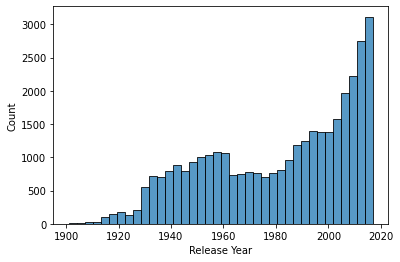

In [13]:
sns.histplot(data, x='Release Year')

## Происхождение

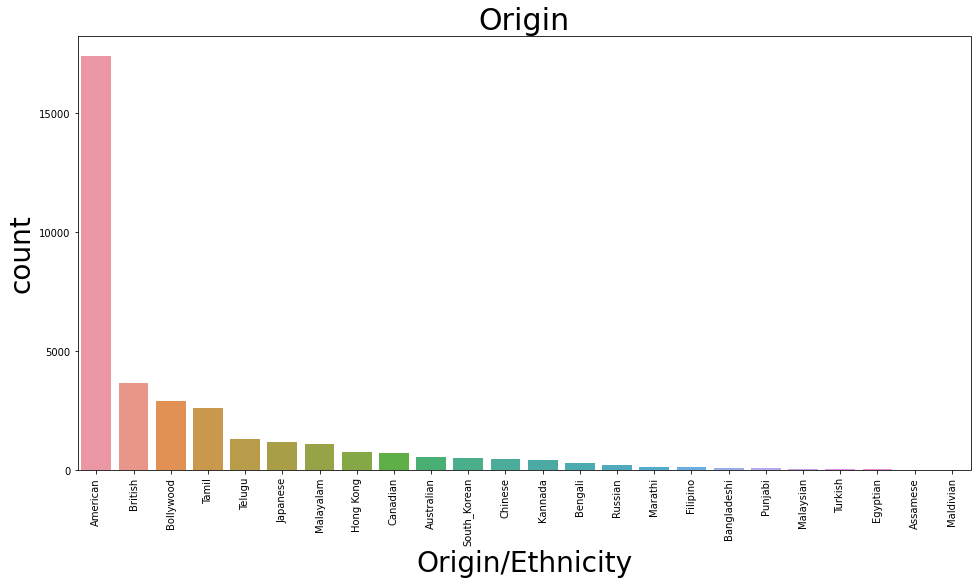

In [14]:
plt.figure(figsize=(16, 8))
plt.xlabel('Origin/Ethnicity', fontsize=28)
plt.ylabel('Counts', fontsize=28)
ax = sns.countplot(data['Origin/Ethnicity'], order=pd.value_counts(data['Origin/Ethnicity']).index)
ax.set_title('Origin', fontsize=30)
plt.rc('font', size=30)
plt.xticks(rotation=90)
pass

# Корректировка данных
Теперь приступим к корректировке данных

Для начала заменим табуляцию: перенос строки - неразрывный, пробел замением на несколько пробелов

In [15]:
data['Title'] = data['Title'].apply(specSymbolsToSpace)
data['Director'] = data['Director'].apply(specSymbolsToSpace)
data['Cast'] = data['Cast'].apply(specSymbolsToSpace)
data['Genre'] = data['Genre'].apply(specSymbolsToSpace)
data['Plot'] = data['Plot'].apply(specSymbolsToSpace)
data['DirectorCorrected'] = data['DirectorCorrected'].apply(specSymbolsToSpace)
data['CastCorrected'] = data['CastCorrected'].apply(specSymbolsToSpace)
data['GenreCorrected'] = data['GenreCorrected'].apply(specSymbolsToSpace)

## Коррекция Вики
Начнем с ссылок на Википедию

1) Исследуем данные

In [16]:
def getRepeats(df:pd.DataFrame, column):
    """
    Для получения повторяющихся элементов
    :param df: Датафрейм с повторяющимися элементами
    :param column: Анализируемая строка
    :return: Датафрейм, в колонке которого есть повторы
    """
    col = df[column]
    return data.loc[list(col[col.duplicated(False)].index)]

In [17]:
dataRepeatsWikis = getRepeats(data, 'Wiki Page')
dataRepeatsWikis.sort_values('Wiki Page').head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
17813,2009,$9.99,Australian,Tatia Rosenthal,Geoffrey Rush Joel Edgerton Anthony LaPaglia C...,animation drama,https://en.wikipedia.org/wiki/$9.99,The film mainly focuses on 28-year-old Dave Pe...,tatia rosenthal,geoffrey rush joel edgerton anthony lapaglia c...,animation drama
17796,2008,$9.99,Australian,Tatia Rosenthal,"Geoffrey Rush, Joel Edgerton, Samuel Johnson",animation,https://en.wikipedia.org/wiki/$9.99,The film mainly focuses on 28-year-old Dave Pe...,tatia rosenthal,"geoffrey rush, joel edgerton, samuel johnson",animation
21611,2016,100 Streets,British,Director: Jim O'Hanlon,"Director: Jim O'Hanlon Cast: Idris Elba, Gemma...",unknown,https://en.wikipedia.org/wiki/100_Streets,The film centers on three characters who have ...,director: jim o'hanlon,"director: jim o'hanlon cast: idris elba, gemma...",unknown
17168,2017,100 Streets,American,Jim O'Hanlon,Jim O'Hanlon (director); Leon F. Butler (scree...,drama,https://en.wikipedia.org/wiki/100_Streets,The film centers on three characters who have ...,jim o'hanlon,jim o'hanlon (director); leon f. butler (scree...,drama
32126,2002,123,Telugu,K. Subhaash,"Prabhu Deva, Jyothika, Raju Sundaram, Nagendra...",comedy,https://en.wikipedia.org/wiki/123_(film),"Tirupathi (Prabhu Deva), Pazhani (Raju Sundara...",k. subhaash,"prabhu deva, jyothika, raju sundaram, nagendra...",comedy


Обратим внимание на, например, индексы 21611 и 17168 (https://en.wikipedia.org/wiki/100_Streets). У одного Жанр (Genre) указан, у второго - 'unknown'. Можно предроложить, что этот серия фильмов, а значит, жанр у них один. Редко бывает, что следующая часть фильма имеет жанр, существенно отличающийся от такого у предыдущей части

In [18]:
dataRepeatsWikis.loc[[21611,17168]]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
21611,2016,100 Streets,British,Director: Jim O'Hanlon,"Director: Jim O'Hanlon Cast: Idris Elba, Gemma...",unknown,https://en.wikipedia.org/wiki/100_Streets,The film centers on three characters who have ...,director: jim o'hanlon,"director: jim o'hanlon cast: idris elba, gemma...",unknown
17168,2017,100 Streets,American,Jim O'Hanlon,Jim O'Hanlon (director); Leon F. Butler (scree...,drama,https://en.wikipedia.org/wiki/100_Streets,The film centers on three characters who have ...,jim o'hanlon,jim o'hanlon (director); leon f. butler (scree...,drama


33517, 33545, 33546 (https://en.wikipedia.org/wiki/20th_Century_Boys#Films) - в отличие от предыдущих случаев на этот раз у нас трилогия фильмов, а не один и тот же фильм с продублированным названием

In [19]:
dataRepeatsWikis.loc[[33517,33545,33546]]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
33517,2008,20th Century Boys 1: Beginning of the End,Japanese,Yukihiko Tsutsumi,"Toshiaki Karasawa, Etsushi Toyokawa, Takako To...","science fiction, mystery",https://en.wikipedia.org/wiki/20th_Century_Boy...,"In 1969, young boys Kenji, Otcho, Yoshitsune a...",yukihiko tsutsumi,"toshiaki karasawa, etsushi toyokawa, takako to...","science fiction, mystery"
33545,2009,20th Century Boys 2: The Last Hope,Japanese,Yukihiko Tsutsumi,"Toshiaki Karasawa, Etsushi Toyokawa, Takako To...","science fiction, mystery",https://en.wikipedia.org/wiki/20th_Century_Boy...,"In 1969, young boys Kenji, Otcho, Yoshitsune a...",yukihiko tsutsumi,"toshiaki karasawa, etsushi toyokawa, takako to...","science fiction, mystery"
33546,2009,20th Century Boys 3: Redemption,Japanese,Yukihiko Tsutsumi,"Toshiaki Karasawa, Etsushi Toyokawa, Takako To...","science fiction, mystery",https://en.wikipedia.org/wiki/20th_Century_Boy...,"In 1969, young boys Kenji, Otcho, Yoshitsune a...",yukihiko tsutsumi,"toshiaki karasawa, etsushi toyokawa, takako to...","science fiction, mystery"


32484 и 31074 (https://en.wikipedia.org/wiki/180_(2011_Tamil_film)). Фильм имеет одинаковую ссылку на Википедию, и если перейти по ней, то будет понятно, что это один и тот же фильм

In [20]:
dataRepeatsWikis.loc[[32484,31074]]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
32484,2011,180,Telugu,Jayendra,"Siddharth, Nithya Menen, Priya Anand, Tanikell...",romantic drama,https://en.wikipedia.org/wiki/180_(2011_Tamil_...,"The movie revolves around Dr. Ajay ""AJ"" Kumar ...",jayendra,"siddharth, nithya menen, priya anand, tanikell...",romantic drama
31074,2011,Nootrenbadhu,Tamil,P. Jayendra,unknown,romantic drama,https://en.wikipedia.org/wiki/180_(2011_Tamil_...,"The movie revolves around Dr. Ajay ""AJ"" Kumar ...",p. jayendra,unknown,romantic drama


17952 и 17271 (https://en.wikipedia.org/wiki/2:22_(2017_film)) -  один и тот же фильм, но с разными жанрами

In [21]:
dataRepeatsWikis.loc[[17952,17271]]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
17952,2017,2:22,Australian,Paul Currie,"Michiel Huisman, Teresa Palmer, Sam Reid",thriller,https://en.wikipedia.org/wiki/2:22_(2017_film),The movie starts with Dylan Branson (Michiel H...,paul currie,"michiel huisman, teresa palmer, sam reid",thriller
17271,2017,2:22,American,Paul Currie,"Paul Currie (director); Nathan Parker, Todd St...","drama, thriller",https://en.wikipedia.org/wiki/2:22_(2017_film),The movie starts with Dylan Branson (Michiel H...,paul currie,"paul currie (director); nathan parker, todd st...","drama, thriller"


У меня есть предположение, что Plot просто дергался с Википедии и записывался в соответствующую ячейку. Если это так и описания фильмов ничем не отличаются, то можно оставлять любое

In [22]:
dataRepeatsWikis.groupby('Wiki Page').nunique().sort_values('Plot', ascending=False).head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Plot,DirectorCorrected,CastCorrected,GenreCorrected
Wiki Page,,,,,,,,,,
https://en.wikipedia.org/wiki/Nanny_McPhee,1,1,2,1,2,2,2,1,2,2
https://en.wikipedia.org/wiki/$9.99,2,1,1,1,2,2,1,1,2,2
https://en.wikipedia.org/wiki/Rakshasa_Rajavu,2,1,1,2,2,1,1,2,2,1
https://en.wikipedia.org/wiki/Ram_Lakshman,2,1,2,2,2,2,1,2,2,2
https://en.wikipedia.org/wiki/Ramakrishna_(film),2,2,2,2,2,2,1,2,2,2


Все Вики-страницы кроме одной имеют после группировки уникальных значений в столбце Plot = 1.

2) Наметим план работы

Можно предложить следующее решение дублирования ссылок:
Фильмы могут быть и многосерийными, и одним и тем же фильмом с уточнениями (жанров, актеров, директора). Можно слепить фильмы, имеющие одну и ту же ссылку на Вики-страницу по следующему принципу:

1) Год выпуска фильма берется наименьший. Если это серия фильмов, либо фильм имеет разные даты проката в разных странах, то корректнее брать наиеменьшее

2) Название идет конкатенацией через разделитель '|', мы знаем что Title не может быть пропущен. Это надо на случай различного называния фильма в разных странах

3) Происхождение объединяем черех ',' после чего удаляем повторения

4) Режиссер идет конкатенацией через ',', после чего удаляются повторения: это позволит исключить одних и тех же людей, и оставить случаи, когда над серией фильмов работали разные люди. Кроме того, так удастся уточнить часть значений 'unknown'

5) Актерский состав идет конкатенацией через ',' с удаление повторений. Такой подход позволит уточнить часть значений 'unknown'

6) Жанр идет конкатенацией через ',' с удаление повторяющихся значений. Так же по возможности уточняем 'unknown'

7) Берется одна Вики-страница

8) Сюжет - берем любое

3) Препроцессинг Вики-страницы

In [23]:
def removeDuplicatesFromRepeats(df:pd.DataFrame, column):
    """
    Удаляем повторы из датарейма с повторами
    :param df: Датарейм с повторами
    :param column: Анализируемая строка
    :return: Очищенный датафрейм
    """
    return df.groupby(column).agg({
        'Release Year': lambda x: min(x),  #+
        'Title': lambda x: ','.join(x),  # Удалить повторения
        'Origin/Ethnicity': lambda x: ','.join(x),  # Удалить повторения
        'Director': lambda x: ','.join(x),  # Удалить повторения
        'Cast': lambda x: ','.join(x),  #Удалить повторения
        'Genre': lambda x: ','.join(x),  #Удалить повторения
        'Plot': lambda x: min(x),  #По сути берем любой
        'DirectorCorrected': lambda x: ','.join(x),
        'CastCorrected': lambda x: ','.join(x),
        'GenreCorrected': lambda x: ','.join(x)
    })

In [24]:
dataRepeatsWikis = removeDuplicatesFromRepeats(dataRepeatsWikis, 'Wiki Page')
dataRepeatsWikis.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Plot,DirectorCorrected,CastCorrected,GenreCorrected
Wiki Page,,,,,,,,,,
https://en.wikipedia.org/wiki/$9.99,2008,"$9.99,$9.99","Australian,Australian","Tatia Rosenthal,Tatia Rosenthal","Geoffrey Rush, Joel Edgerton, Samuel Johnson,G...","animation,animation drama",The film mainly focuses on 28-year-old Dave Pe...,"tatia rosenthal,tatia rosenthal","geoffrey rush, joel edgerton, samuel johnson,g...","animation,animation drama"
https://en.wikipedia.org/wiki/100_Streets,2016,"100 Streets,100 Streets","American,British","Jim O'Hanlon,Director: Jim O'Hanlon",Jim O'Hanlon (director); Leon F. Butler (scree...,"drama,unknown",The film centers on three characters who have ...,"jim o'hanlon,director: jim o'hanlon",jim o'hanlon (director); leon f. butler (scree...,"drama,unknown"
https://en.wikipedia.org/wiki/123_(film),2002,"123,123,123","Kannada,Tamil,Telugu","K. Subhash,K. Subash,K. Subhaash","Prabhu Deva, Raju Sundaram, Jyothika, Nagendra...","unknown,unknown,comedy","Tirupathi (Prabhu Deva), Pazhani (Raju Sundara...","k. subhash,k. subash,k. subhaash","prabhu deva, raju sundaram, jyothika, nagendra...","unknown,unknown,comedy"
https://en.wikipedia.org/wiki/12_Years_a_Slave_(film),2013,"12 Years a Slave,12 Years a Slave","American,British","Steve McQueen,Director: Steve McQueen","Chiwetel Ejiofor, Michael Fassbender, Benedict...","drama,unknown","In 1841, Solomon Northup is a free African-Ame...","steve mcqueen,director: steve mcqueen","chiwetel ejiofor, michael fassbender, benedict...","drama,unknown"
https://en.wikipedia.org/wiki/14_Blades,2010,"14 Blades,14 Blades","Chinese,Hong Kong","Daniel Lee Yan-Kong,Daniel Lee","Donnie Yen, Zhao Wei,Donnie Yen, Zhao Wei","historical/action,martial arts","During the late Ming Dynasty, the imperial cou...","daniel lee yan-kong,daniel lee","donnie yen, zhao wei,donnie yen, zhao wei","historical/action,martial arts"


In [25]:
def removeLinkFromColumn(df: pd.DataFrame, column):
    """
    Выносим данные из индекса в столбец
    """
    df[column] = df.index.copy()
    df.reset_index(drop=True, inplace=True)
    return df

In [26]:
dataRepeatsWikis = removeLinkFromColumn(dataRepeatsWikis, 'Wiki Page')
dataRepeatsWikis.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Plot,DirectorCorrected,CastCorrected,GenreCorrected,Wiki Page
0,2008,"$9.99,$9.99","Australian,Australian","Tatia Rosenthal,Tatia Rosenthal","Geoffrey Rush, Joel Edgerton, Samuel Johnson,G...","animation,animation drama",The film mainly focuses on 28-year-old Dave Pe...,"tatia rosenthal,tatia rosenthal","geoffrey rush, joel edgerton, samuel johnson,g...","animation,animation drama",https://en.wikipedia.org/wiki/$9.99
1,2016,"100 Streets,100 Streets","American,British","Jim O'Hanlon,Director: Jim O'Hanlon",Jim O'Hanlon (director); Leon F. Butler (scree...,"drama,unknown",The film centers on three characters who have ...,"jim o'hanlon,director: jim o'hanlon",jim o'hanlon (director); leon f. butler (scree...,"drama,unknown",https://en.wikipedia.org/wiki/100_Streets
2,2002,"123,123,123","Kannada,Tamil,Telugu","K. Subhash,K. Subash,K. Subhaash","Prabhu Deva, Raju Sundaram, Jyothika, Nagendra...","unknown,unknown,comedy","Tirupathi (Prabhu Deva), Pazhani (Raju Sundara...","k. subhash,k. subash,k. subhaash","prabhu deva, raju sundaram, jyothika, nagendra...","unknown,unknown,comedy",https://en.wikipedia.org/wiki/123_(film)
3,2013,"12 Years a Slave,12 Years a Slave","American,British","Steve McQueen,Director: Steve McQueen","Chiwetel Ejiofor, Michael Fassbender, Benedict...","drama,unknown","In 1841, Solomon Northup is a free African-Ame...","steve mcqueen,director: steve mcqueen","chiwetel ejiofor, michael fassbender, benedict...","drama,unknown",https://en.wikipedia.org/wiki/12_Years_a_Slave...
4,2010,"14 Blades,14 Blades","Chinese,Hong Kong","Daniel Lee Yan-Kong,Daniel Lee","Donnie Yen, Zhao Wei,Donnie Yen, Zhao Wei","historical/action,martial arts","During the late Ming Dynasty, the imperial cou...","daniel lee yan-kong,daniel lee","donnie yen, zhao wei,donnie yen, zhao wei","historical/action,martial arts",https://en.wikipedia.org/wiki/14_Blades


4) Теперь удалим повторения

In [27]:
def removeDuplicates(df :pd.DataFrame):
    """
    Удаляем одни и те же элементы внутри одной ячейки
    :param df: Анализируемый датафрейм
    :return:
    """
    df['Title'] = df['Title'].apply(correctWithoutSor, separator=',')
    df['Origin/Ethnicity'] = df['Origin/Ethnicity'].apply(correctWithoutSor, separator=',')
    df['Director'] = df['Director'].apply(correctWithoutSor, separator=',')
    df['Cast'] = df['Cast'].apply(correctWithoutSor, separator=',')
    df['Genre'] = df['Genre'].apply(correctWithoutSor, separator=',')
    df['DirectorCorrected'] = df['DirectorCorrected'].apply(correctWithoutSor, separator=',')
    df['CastCorrected'] = df['CastCorrected'].apply(correctWithoutSor, separator=',')
    df['GenreCorrected'] = df['GenreCorrected'].apply(correctWithoutSor, separator=',')
    return df

In [28]:
dataRepeatsWikis = removeDuplicates(dataRepeatsWikis)

5) Обновление датафрейма

In [29]:
def updateDataFrame(_data:pd.DataFrame, repeatsDf:pd.DataFrame, column):
    """
    Удаляем данные с повторами и добавляем очищенные. Обновляем индексы
    """
    #Удаляем индексы, соответсвующие повторяющимся элементам
    _data = _data.drop(index=_data[column][_data[column].duplicated(False)].index)
    #Добавляем откорректированные записи
    _data = _data.append(repeatsDf, ignore_index=True)
    _data = _data.reset_index()
    _data = _data.drop(columns='index')
    return _data

In [30]:
data = updateDataFrame(data, dataRepeatsWikis, 'Wiki Page')

## Исправление названий

In [31]:
#Составим датафрейм с повторяющимися названиями
title = data['Title']
data.loc[list(title[title.duplicated(False)].index)].sort_values('Title').head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
32639,2014,10,Russian,Unknown,The Adventurers,unknown,https://en.wikipedia.org/wiki/The_Adventurers_...,Katya and Andrey arrive in Malta on the eve of...,unknown,the adventurers,unknown
9425,1979,10,American,Blake Edwards,"Dudley Moore, Julie Andrews, Bo Derek, Robert ...",unknown,https://en.wikipedia.org/wiki/10_(film),During a surprise 42nd birthday party for weal...,blake edwards,"dudley moore, julie andrews, bo derek, robert ...",unknown
23266,2012,100% Love,Bengali,Rabi Kinagi,"Jeet, Koel Mallick, Supriya Dutta",romance,https://en.wikipedia.org/wiki/100%25_Love_(201...,Rahul (Jeet) is from a middle-class family. He...,rabi kinagi,"jeet, koel mallick, supriya dutta",romance
31054,2011,100% Love,Telugu,Sukumar,"Naga Chaitanya, Tamannaah Bhatia, Tara Alisha",romance,https://en.wikipedia.org/wiki/100%25_Love_(201...,Balu (Naga Chaitanya) is always the top ranker...,sukumar,"naga chaitanya, tamannaah bhatia, tara alisha",romance
32545,2007,12,Russian,Nikita Mikhalkov,unknown,crime,https://en.wikipedia.org/wiki/12_(2007_film),The jury decides whether a young Chechen boy i...,nikita mikhalkov,unknown,crime


Не имеет смысла отдельно обрабатывать схожие названия, по большому счету все фильмы являются уникальными, т.к. их описания различные

Можно обратить внимание на индексы 4769 и 4541: они имеют схожее описание, а Вики-страница второй - редирект с первой, но их жанры различны

In [32]:
data.loc[[4769,4541]]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
4769,1949,Act of Violence,American,Fred Zinnemann,"Van Heflin, Robert Ryan, Janet Leigh, Mary Astor",drama,https://en.wikipedia.org/wiki/Act_of_Violence,After surviving a Nazi POW camp where comrades...,fred zinnemann,"van heflin, robert ryan, janet leigh, mary astor",drama
4541,1948,Act of Violence,American,Fred Zinnemann,"Van Heflin, Robert Ryan, Janet Leigh, Mary Astor",film noir,https://en.wikipedia.org/wiki/Act_of_Violence_...,After surviving a Nazi POW camp where comrades...,fred zinnemann,"van heflin, robert ryan, janet leigh, mary astor",film noir


130, 17129, 5955 - различные экранизации книги. Имеют различное описания и жанры

In [33]:
data.loc[[130,17129,5955]]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
130,1916,"20,000 Leagues Under the Sea",American,Stuart Paton,"Lois Alexander, Curtis Benton, Wallace Clarke,...",action adventure,"https://en.wikipedia.org/wiki/20,000_Leagues_U...","A strange giant ""sea creature"" has been rampag...",stuart paton,"lois alexander, curtis benton, wallace clarke,...",action adventure
17129,1985,"20,000 Leagues Under the Sea",Australian,Tim Brooke-Hunt,Tom Burlinson,animation / adventure,"https://en.wikipedia.org/wiki/20,000_Leagues_U...","In the year 1866, a mysterious sea-monster is ...",tim brooke-hunt,tom burlinson,animation / adventure
5955,1954,"20,000 Leagues Under the Sea",American,Richard Fleischer,"Kirk Douglas, James Mason, Paul Lukas, Peter L...",adventure,"https://en.wikipedia.org/wiki/20,000_Leagues_U...","In 1868, rumors of a sea monster attacking shi...",richard fleischer,"kirk douglas, james mason, paul lukas, peter l...",adventure


Решение: смотрим по описанию, если оно совпадает, то тогда объединяем две записи в одну

Такой подход позволит очистить данные от редиректов


## Корректируем сюжет

1) Данные

In [34]:
dataRepeatsPlot = getRepeats(data, 'Plot')
dataRepeatsPlot.sort_values('Plot').head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
32186,2012,One Piece: Film Z,Japanese,Tatsuya Nagamine,"Mayumi Tanaka, Kazuya Nakai, Akemi Okamura",anime,https://en.wikipedia.org/wiki/One_Piece:_Film_Z,"""Black Arm"" Zephyr (黒腕のゼファー, Kokuwan no Zefā),...",tatsuya nagamine,"mayumi tanaka, kazuya nakai, akemi okamura",anime
32190,2013,One Piece Film: Z,Japanese,Tatsuya Nagamine,Mayumi Tanaka,unknown,https://en.wikipedia.org/wiki/One_Piece_Film:_Z,"""Black Arm"" Zephyr (黒腕のゼファー, Kokuwan no Zefā),...",tatsuya nagamine,mayumi tanaka,unknown
31836,2001,Kinnikuman Nisei the Movie,Japanese,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kinnikuman_Movie...,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou...",unknown,unknown,unknown
31858,2002,Kinnikuman Nisei: Muscle Carrot Competition! T...,Japanese,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kinnikuman_Movie...,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou...",unknown,unknown,unknown
31631,1985,Kinnikuman the Movie: Counterattack! The Under...,Japanese,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Counterattack!_T...,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou...",unknown,unknown,unknown


2) План

Действуем аналогично тому, как мы поступали с Вики-страницами

Если описание двух фильмов совпадает при разнице в ссылках, то одна из ссылок попросту ведет на другую. Решение:

1) Год выпуска фильма берется наименьший. Если это серия фильмов, либо фильм имеет разные даты проката в разных странах, то корректнее брать наиеменьшее

2) Название идет конкатенацией через разделитель '|', мы знаем что Title не может быть пропущен. Удаляем повторы

3) Происхождение объединяем черех ',' после чего удаляем повторения

4) Режиссер идет конкатенацией через ',', после чего удаляются повторения: это позволит исключить одних и тех же людей, и оставить случаи, когда над серией фильмов работали разные люди. Кроме того, так удастся уточнить часть значений 'unknown'

5) Актерский состав идет конкатенацией через ',' с удаление повторений. Такой подход позволит уточнить часть значений 'unknown'

6) Жанр идет конкатенацией через ',' с удаление повторяющихся значений

7) Берется одна Вики-страница

8) Сюжет - берем любое

3) Препроцессинг

In [35]:
dataRepeatsPlot = removeDuplicatesFromRepeats(dataRepeatsPlot, 'Plot')
dataRepeatsPlot.head()

Release Year  \
Plot                                                               
"Black Arm" Zephyr (黒腕のゼファー, Kokuwan no Zefā), ...          2012   
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chouj...          1985   
47 (Rupert Friend) is an "agent", a genetically...          2015   
A 14-year-old forlorn Kalyani delivers a boy in...          1991   
A drug bust is about to go down and Chicago cop...          1987   

                                                                                                Title  \
Plot                                                                                                    
"Black Arm" Zephyr (黒腕のゼファー, Kokuwan no Zefā), ...                One Piece: Film Z,One Piece Film: Z   
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chouj...  Kinnikuman the Movie: Counterattack! The Under...   
47 (Rupert Friend) is an "agent", a genetically...                          Agent 47,Hitman: Agent 47   
A 14-year-old forlorn Kalyani delivers a boy in...                               Thalapathi,Dalapathi   
A drug bust is about to go down and Chicago cop...                              Rent-a-Cop,Rent-A-Cop   

                                                                                     Origin/Ethnicity  \
Plot                                                                                                    
"Black Arm" Zephyr (黒腕のゼファー, Kokuwan no Zefā), ...                                  Japanese,Japanese   
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chouj...  Japanese,Japanese,Japanese,Japanese,Japanese,J...   
47 (Rupert Friend) is an "agent", a genetically...                                   American,British   
A 14-year-old forlorn Kalyani delivers a boy in...                                   Bollywood,Telugu   
A drug bust is about to go down and Chicago cop...                                  American,American   

                                                                                           Director  \
Plot                                                                                                  
"Black Arm" Zephyr (黒腕のゼファー, Kokuwan no Zefā), ...                Tatsuya Nagamine,Tatsuya Nagamine   
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chouj...  Unknown,Unknown,Unknown,Unknown,Unknown,Unknown   
47 (Rupert Friend) is an "agent", a genetically...        Aleksander Bach,Director: Aleksander Bach   
A 14-year-old forlorn Kalyani delivers a boy in...                          Mani Ratnam,Mani Ratnam   
A drug bust is about to go down and Chicago cop...                        Jerry London,Jerry London   

                                                                                                 Cast  \
Plot                                                                                                    
"Black Arm" Zephyr (黒腕のゼファー, Kokuwan no Zefā), ...  Mayumi Tanaka, Kazuya Nakai, Akemi Okamura,May...   
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chouj...    unknown,unknown,unknown,unknown,unknown,unknown   
47 (Rupert Friend) is an "agent", a genetically...  Rupert Friend Zachary Quinto Hannah Ware Thoma...   
A 14-year-old forlorn Kalyani delivers a boy in...  Rajinikanth, Mammootty, Shobana,Rajinikanth, M...   
A drug bust is about to go down and Chicago cop...  Burt Reynolds, Liza Minnelli, James Remar,Burt...   

                                                                                              Genre  \
Plot                                                                                                  
"Black Arm" Zephyr (黒腕のゼファー, Kokuwan no Zefā), ...                                    anime,unknown   
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chouj...  unknown,unknown,unknown,unknown,unknown,unknown   
47 (Rupert Friend) is an "agent", a genetically...                                   action,unknown   
A 14-year-old forlorn Kalyani delivers a boy in...                             crime, drama,unknown   
A drug bust is about to go 

In [36]:
dataRepeatsPlot = removeLinkFromColumn(dataRepeatsPlot, 'Plot')
dataRepeatsPlot.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,2012,"One Piece: Film Z,One Piece Film: Z","Japanese,Japanese","Tatsuya Nagamine,Tatsuya Nagamine","Mayumi Tanaka, Kazuya Nakai, Akemi Okamura,May...","anime,unknown","""Black Arm"" Zephyr (黒腕のゼファー, Kokuwan no Zefā),...","tatsuya nagamine,tatsuya nagamine","mayumi tanaka, kazuya nakai, akemi okamura,may...","anime,unknown"
1,1985,Kinnikuman the Movie: Counterattack! The Under...,"Japanese,Japanese,Japanese,Japanese,Japanese,J...","Unknown,Unknown,Unknown,Unknown,Unknown,Unknown","unknown,unknown,unknown,unknown,unknown,unknown","unknown,unknown,unknown,unknown,unknown,unknown","(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou...","unknown,unknown,unknown,unknown,unknown,unknown","unknown,unknown,unknown,unknown,unknown,unknown","unknown,unknown,unknown,unknown,unknown,unknown"
2,2015,"Agent 47,Hitman: Agent 47","American,British","Aleksander Bach,Director: Aleksander Bach",Rupert Friend Zachary Quinto Hannah Ware Thoma...,"action,unknown","47 (Rupert Friend) is an ""agent"", a geneticall...","aleksander bach,director: aleksander bach",rupert friend zachary quinto hannah ware thoma...,"action,unknown"
3,1991,"Thalapathi,Dalapathi","Bollywood,Telugu","Mani Ratnam,Mani Ratnam","Rajinikanth, Mammootty, Shobana,Rajinikanth, M...","crime, drama,unknown",A 14-year-old forlorn Kalyani delivers a boy i...,"mani ratnam,mani ratnam","rajinikanth, mammootty, shobana,rajinikanth, m...","crime, drama,unknown"
4,1987,"Rent-a-Cop,Rent-A-Cop","American,American","Jerry London,Jerry London","Burt Reynolds, Liza Minnelli, James Remar,Burt...","action,crime drama",A drug bust is about to go down and Chicago co...,"jerry london,jerry london","burt reynolds, liza minnelli, james remar,burt...","action,crime drama"


4) Удалим повторения

In [37]:
dataRepeatsPlot = removeDuplicates(dataRepeatsPlot)

5) Объединеним данные

In [38]:
data = updateDataFrame(data, dataRepeatsPlot, 'Plot')

## Исправляем все, что связано с людьми

### Исправление жанров, актерского состава и режиссеров
Теперь необходимо как-то стандартизировать жанры

#### Часть 0
Вступление

In [39]:
data.shape

(33868, 11)

In [40]:
assert data.shape == (33868, 11)

In [41]:
data.head(10)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,1901,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,unknown,unknown
1,1901,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,unknown,unknown
2,1901,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,unknown,unknown
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,unknown,unknown
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter",unknown,unknown
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab...",cecil hepworth,may clark,unknown
6,1903,The Great Train Robbery,American,Edwin S. Porter,unknown,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...,edwin s. porter,unknown,western
7,1904,The Suburbanite,American,Wallace McCutcheon,unknown,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...,wallace mccutcheon,unknown,comedy
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,unknown,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...,edwin stanton porter,unknown,unknown
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,unknown,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....,edwin stanton porter,unknown,unknown


In [42]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

In [43]:
pd.Series(data['GenreCorrected'].unique()).head()

0                       unknown
1                       western
2                        comedy
3                         short
4    short action/crime western
dtype: object

Жанры содержат в себе всякий мусор
* drama based on the play by bernard slade
* animated short co-produced with the national film board
и т.д.

In [44]:
data.loc[2280]

Release Year                                                      1937
Title                                             Think Fast, Mr. Moto
Origin/Ethnicity                                              American
Director                                                 Norman Foster
Cast                          Peter Lorre, Virginia Field, Thomas Beck
Genre                                                   drama, mystery
Wiki Page            https://en.wikipedia.org/wiki/Think_Fast,_Mr._...
Plot                 The film opens with Mr. Moto in disguise as a ...
DirectorCorrected                                        norman foster
CastCorrected                 peter lorre, virginia field, thomas beck
GenreCorrected                                          drama, mystery
Name: 2280, dtype: object

Как-то актеры (например, Uday Kiran) попали в жанр, надо их оттуда вытащить
Идея: смотрим genre и cast, бежим по всем записям, если cast.contains(element from genre) выпихиваем элемент, выводим элемент (например, на случай существования актера, который имеет фамилию romantic)
На всякий случай сделаем то же самое и для директора

Для начала доработаем с жанрами, так мы сможем определить список различных написаний одного и того же жанра (например sci-fi, scifi и science fiction). Потом проработаем моменты с актерами и режиссерами

#### Часть 1
Для начала работаем с людьми, которые попали и в жанр, и в актеров/режиссеров

In [45]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

In [46]:
data.loc[27353]

Release Year                                                      2010
Title                                         Yogesh Dattatraya Gosavi
Origin/Ethnicity                                               Marathi
Director             Sandeep Kulkarni, Kishor Kadam, Neelam Shirke,...
Cast                                                             Drama
Genre                yogesh dattatraya gosavi's directorial debut. [9]
Wiki Page            https://en.wikipedia.org/wiki/Pratisaad_-_The_...
Plot                 Dr. Aditya (Sandeep Kulkarni), a leading homeo...
DirectorCorrected    sandeep kulkarni, kishor kadam, neelam shirke,...
CastCorrected                                                    drama
GenreCorrected       yogesh dattatraya gosavi's directorial debut. [9]
Name: 27353, dtype: object

Состав может быть перепутан с жанром
Вероятнее, это справедливо для всех полей. Часть из них может принадлежать другим

Определим список актеров и режиссеров, которые попали и в соответсвующие им колонки, и в жанр. Возможно, это упростит работу в дальнейшем

In [47]:
def find_unique(row, separator: str):
    """
    Возвращаем уникальные записи, разделенные сепаратором + стрипим их
    @return ret = set
    """
    ret = str(row).split(separator)
    for i in range(len(ret)):
        ret[i] = ret[i].strip()
    ret = set(ret)
    ret.discard('')
    return ret

In [48]:
directors_set = set()
casts_set = set()
genres_set = set()
for index, row in data.iterrows():
    directors = row['DirectorCorrected'].replace('/', ',').replace('-', ',')
    directors_set.update(find_unique(directors, ','))

    casts = row['CastCorrected'].replace('/', ',').replace('-', ',')
    casts_set.update(find_unique(casts, ','))

    genres = row['GenreCorrected'].replace('/', ',').replace('-', ',')
    genres_set.update(find_unique(genres, ','))

In [49]:
suspicious_genres_not_pair = set()
for genre in genres_set:
    if genre != 'unknown':
        if genre in directors_set:
            suspicious_genres_not_pair.add(genre)
        if genre in casts_set:
            suspicious_genres_not_pair.add(genre)
print(len(suspicious_genres_not_pair))

118


In [50]:
suspicious_genres = set()
for genre in genres_set:
    if genre != 'unknown':
        if genre in directors_set:
            suspicious_genres.add((genre, 'd'))
        if genre in casts_set:
            suspicious_genres.add((genre, 'c'))
print(len(suspicious_genres))

137


Всего есть 118 записей, которые попали и в актеров/режиссеров, и в жанр. Стоит просмотреть список и удалить существующие жанры, которые попали к актерам.

In [51]:
genre_list = [
    'action',
    'animated',
    'comedy',
    'crime',
    'cult',
    'drama',
    'erotic thriller',
    'family',
    'musical',
    'mystery',
    'fantasy',
    'heist',
    'historical',
    'history',
    'horror',
    'love',
    'romantic comedy',
    'romantic fantasy',
    'social',
    'sports',
    'thriller',
    'war',
    'romance',
    'suspense'  #thriller
]
len(genre_list)

24

Обновили/сократили варианты подозрительных жанров, можно будет их выносить в имена актеров/режиссеров соответсвенно

In [52]:
suspicious_genres_not_pair = suspicious_genres_not_pair - set(genre_list)
len(suspicious_genres_not_pair)

94

94 жанров на самом деле содержат имена актеров и/или режиссеров

Убираем жанры, содержаие в себе режиссера и/или актеров

In [53]:
for index, row in data.iterrows():

    genres = row['Genre'].replace('/', ',').replace('-', ',')
    genres = find_unique(genres, ',')

    len_genres = len(genres)
    diff = genres.difference(suspicious_genres_not_pair)
    len_diff = len(diff)

    # те произошли изменения
    if len_genres != len_diff:
        for s_genre in suspicious_genres:
            if s_genre[0] in genres:
                if s_genre[1] == 'c':
                    row['CastCorrected'] = row['CastCorrected'] + ',' + s_genre[0]
                if s_genre[1] == 'd':
                    row['DirectorCorrected'] = row['DirectorCorrected'] + ',' + s_genre[0]
                genres = genres - suspicious_genres_not_pair
                row['GenreCorrected'] = ','.join(genres)

        data.iloc[index] = row

Теперь откорректируем названия полей

In [54]:
def regex(line:str):
    """
    Заменяем различные символы на ','
    :param line:
    :return:
    """
    ret = re.sub(r" */ *", ",", line)
    ret = re.sub(r" *, *", ',', ret)
    return re.sub(r" .[-–] .", ",", ret)
data['GenreCorrected'] = data['GenreCorrected'].apply(regex)

#### Часть 2
Теперь работаем с людьми, которые попали только в жанр

In [55]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

In [56]:
data_copy = data.copy()

In [57]:
data = data_copy.copy()

In [58]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

In [59]:
data.iloc[30106]

Release Year                                                      1975
Title                                              Dasari Narayana Rao
Origin/Ethnicity                                                Telugu
Director                                          Sobhan Babu, Sharada
Cast                                                             Drama
Genre                                         chakravarthy musical hit
Wiki Page                    https://en.wikipedia.org/wiki/Balipeetham
Plot                 Bhaskar (Shobhan Babu), a Dalit marries Aruna ...
DirectorCorrected                                 sobhan babu, sharada
CastCorrected                                                    drama
GenreCorrected                                chakravarthy musical hit
Name: 30106, dtype: object

In [60]:
# Чтобы слегка уменьшить код, вынесем актеров, которые не встречаются среди актеров и жанров в отдельный .txt файл
actors_txt = set()
with open("/content/actors.txt") as file:
    for line in file:
        actors_txt.add(line.replace('\n', '').strip())

In [61]:
for index, row in data[:10].iterrows():
    genresCorrected = ' ' + str(row['GenreCorrected']) + ' '
    for punct in string.punctuation:
        genresCorrected = genresCorrected.replace(punct, ' ')

    for actor_txt in actors_txt:
        if genresCorrected.__contains__(' ' + actor_txt + ' '):
            print(genresCorrected, actor_txt)
            row['CastCorrected'] = row['CastCorrected'] + ',' + actor_txt
            genresCorrected = re.sub(r" *" + actor_txt + " *", ' ', genresCorrected)
            row['GenreCorrected'] = genresCorrected
            data.iloc[index] = row

In [62]:
data.iloc[7:10]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
7,1904,The Suburbanite,American,Wallace McCutcheon,unknown,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...,wallace mccutcheon,unknown,comedy
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,unknown,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...,edwin stanton porter,unknown,unknown
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,unknown,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....,edwin stanton porter,unknown,unknown


#### Часть 3
Очищаем от оставшегося мусора + стандартизируем жанры

In [63]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

Для этого прибегнем к следующему трюку:
Создадим два направденных графа без циклов
В первом жанры переходят в жанры без пробелов
Второй же содержит более сложные конструкции

Затем для каждой строки будем смотреть сложные конструкции и спличенные по пробелам, все полученные жанры - новые жанры

In [64]:
data.loc[7]

Release Year                                                      1904
Title                                                  The Suburbanite
Origin/Ethnicity                                              American
Director                                            Wallace McCutcheon
Cast                                                           unknown
Genre                                                           comedy
Wiki Page                https://en.wikipedia.org/wiki/The_Suburbanite
Plot                 The film is about a family who move to the sub...
DirectorCorrected                                   wallace mccutcheon
CastCorrected                                                  unknown
GenreCorrected                                                  comedy
Name: 7, dtype: object

In [65]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

In [66]:
# for graphviz
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 21 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-common all 2.24.32-1ubuntu1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgtk2.0-0 amd64 2.24.32-1ubuntu1 [1,769 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main

In [67]:
import pygraphviz as pgv
from pygraphviz import *

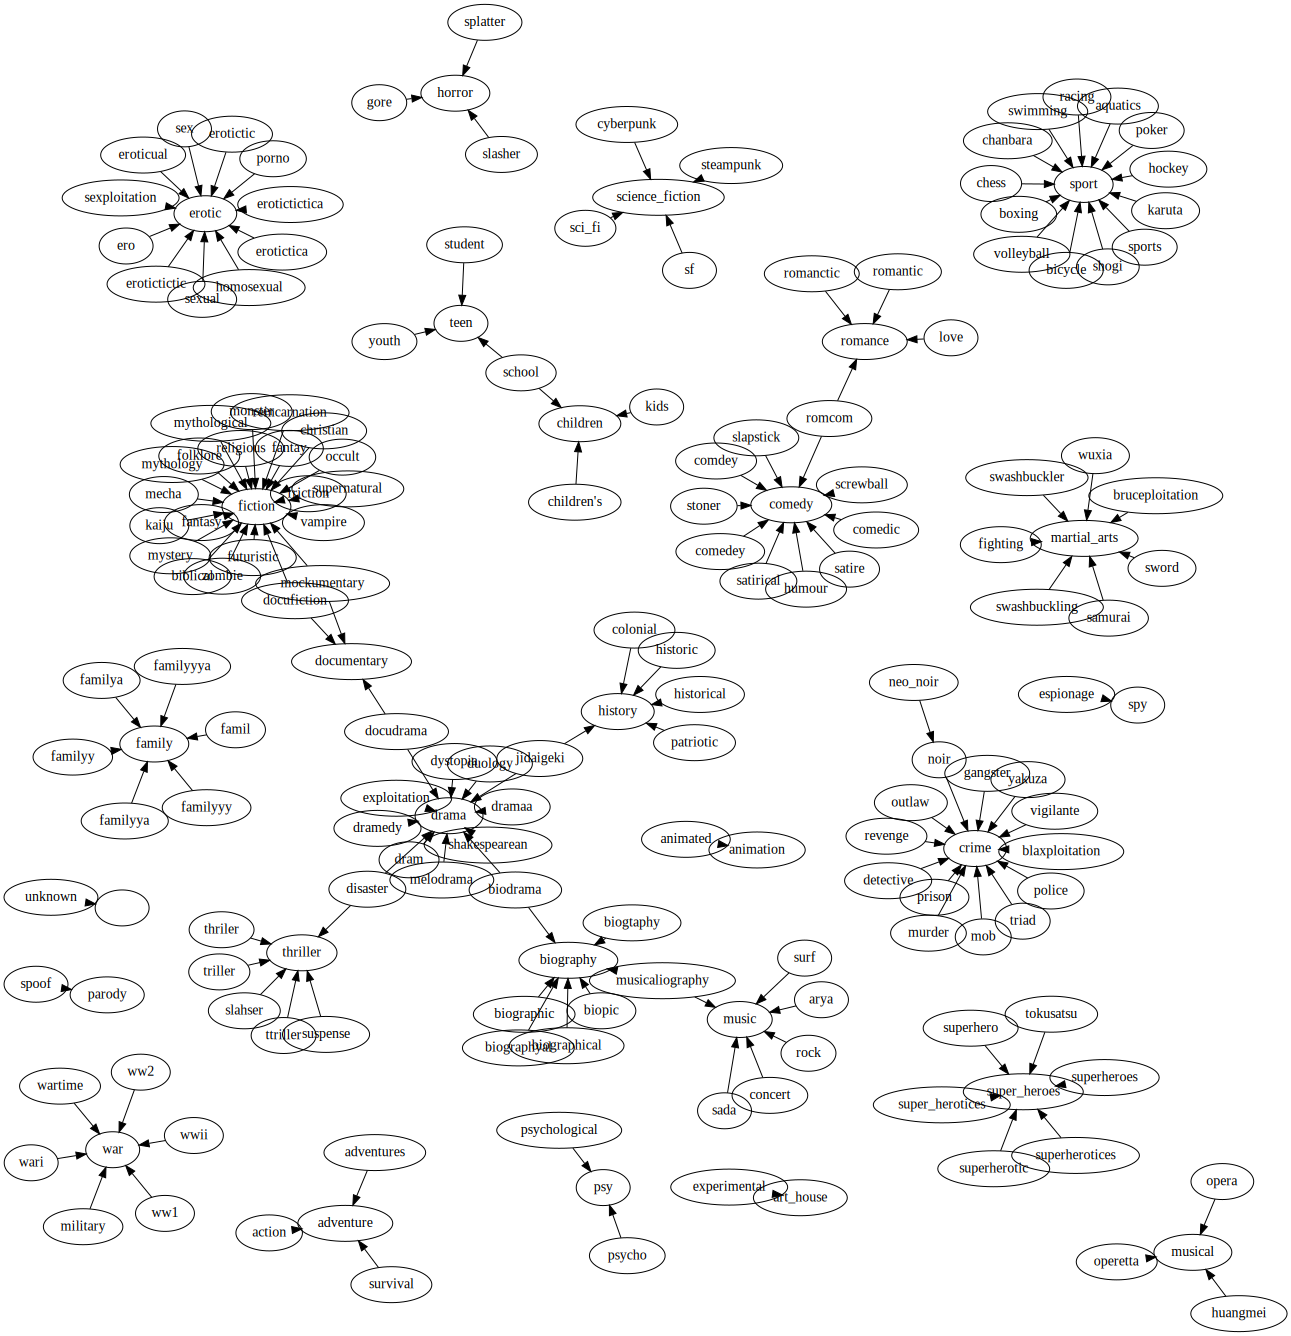

In [68]:
G_simple = pgv.AGraph(strict=True, directed=True)
G_simple.add_edges_from(
    [('unknown', ' '),

     ('action', 'adventure'),

     ('survival', 'adventure'),
     ('adventures', 'adventure'),

     ('animated', 'animation'),

     ('experimental', 'art_house'),

     ('biographical', 'biography'),
     ('biopic', 'biography'),

     ('biographic', 'biography'),
     ('biogtaphy', 'biography'),
     ('biographyal', 'biography'),
     ('biodrama', 'biography'),
     ('biodrama', 'biography'),
     ('musicaliography', 'biography'),

     ("children's", 'children'),
     ('kids', 'children'),
     ('school', 'children'),

     ('stoner', 'comedy'),
     ('humour', 'comedy'),
     ('slapstick', 'comedy'),
     ('screwball', 'comedy'),
     ('comdey', 'comedy'),
     ('comedey', 'comedy'),
     ('comedic', 'comedy'),
     ('satirical', 'comedy'),
     ('satire', 'comedy'),
     ('romcom', 'comedy'),

     ('detective', 'crime'),
     ('noir', 'crime'),
     ('gangster', 'crime'),
     ('yakuza', 'crime'),
     ('outlaw', 'crime'),
     ('murder', 'crime'),
     ('police', 'crime'),
     ('prison', 'crime'),

     ('triad', 'crime'),
     ('yakuza', 'crime'),
     ('mob', 'crime'),
     ('revenge', 'crime'),
     ('blaxploitation', 'crime'),
     ('vigilante', 'crime'),

     ('docudrama', 'documentary'),
     ('mockumentary', 'documentary'),
     ('docufiction', 'documentary'),

     ('melodrama', 'drama'),
     ('shakespearean', 'drama'),
     ('exploitation', 'drama'),
     ('dramedy', 'drama'),
     ('jidaigeki', 'drama'),
     ('biodrama', 'drama'),
     ('jidaigeki', 'drama'),
     ('dram', 'drama'),
     ('dramaa', 'drama'),
     ('duology', 'drama'),
     ('docudrama', 'drama'),

     ('dramedy', 'drama'),
     ('dystopia', 'drama'),

     ('disaster', 'drama'),

     ('sexploitation', 'erotic'),
     ('sexual', 'erotic'),
     ('sex', 'erotic'),
     ('sexual', 'erotic'),
     ('porno', 'erotic'),
     ('erotictic', 'erotic'),
     ('erotictictic', 'erotic'),
     ('erotictictica', 'erotic'),
     ('sexual', 'erotic'),
     ('ero', 'erotic'),
     ('erotictica', 'erotic'),
     ('sexual', 'erotic'),
     ('homosexual', 'erotic'),
     ('sexual', 'erotic'),
     ('erotictic', 'erotic'),
     ('eroticual', 'erotic'),
     ('sexual', 'erotic'),
     ('homosexual', 'erotic'),
     ('sexploitation', 'erotic'),
     ('sexual', 'erotic'),

     ('familyy', 'family'),
     ('familyyy', 'family'),
     ('familyyya', 'family'),
     ('famil', 'family'),
     ('familya', 'family'),
     ('familyya', 'family'),

     ('fantasy', 'fiction'),
     ('zombie', 'fiction'),
     ('vampire', 'fiction'),

     ('fantay', 'fiction'),
     ('docufiction', 'fiction'),
     ('friction', 'fiction'),
     ('biblical', 'fiction'),
     ('mockumentary', 'fiction'),
     ('folklore', 'fiction'),
     ('christian', 'fiction'),

     ('futuristic', 'fiction'),
     ('religious', 'fiction'),
     ('reincarnation', 'fiction'),
     ('mecha', 'fiction'),
     ('kaiju', 'fiction'),
     ('monster', 'fiction'),
     ('mythological', 'fiction'),
     ('mythology', 'fiction'),
     ('occult', 'fiction'),
     ('supernatural', 'fiction'),

     ('mystery', 'fiction'),

     ('historical', 'history'),
     ('patriotic', 'history'),

     ('colonial', 'history'),

     ('historic', 'history'),

     ('jidaigeki', 'history'),
     ('jidaigeki', 'history'),

     ('gore', 'horror'),
     ('slasher', 'horror'),
     ('slasher', 'horror'),
     ('splatter', 'horror'),

     ('fighting', 'martial_arts'),

     ('samurai', 'martial_arts'),
     ('wuxia', 'martial_arts'),

     ('bruceploitation', 'martial_arts'),
     ('swashbuckler', 'martial_arts'),
     ('swashbuckling', 'martial_arts'),
     ('sword', 'martial_arts'),

     ('arya', 'music'),
     ('sada', 'music'),
     ('rock', 'music'),
     ('surf', 'music'),
     ('concert', 'music'),
     ('musicaliography', 'music'),

     ('operetta', 'musical'),
     ('huangmei', 'musical'),
     ('opera', 'musical'),

     ('neo_noir', 'noir'),

     ('spoof', 'parody'),

     ('psychological', 'psy'),
     ('psycho', 'psy'),

     ('love', 'romance'),

     ('romantic', 'romance'),

     ('romcom', 'romance'),

     ('romanctic', 'romance'),

     ('sci_fi', 'science_fiction'),

     ('sf', 'science_fiction'),

     ('cyberpunk', 'science_fiction'),
     ('steampunk', 'science_fiction'),

     ('chess', 'sport'),
     ('bicycle', 'sport'),
     ('racing', 'sport'),
     ('aquatics', 'sport'),
     ('swimming', 'sport'),
     ('volleyball', 'sport'),
     ('karuta', 'sport'),
     ('boxing', 'sport'),
     ('sports', 'sport'),
     ('shogi', 'sport'),
     ('chanbara', 'sport'),
     ('hockey', 'sport'),
     ('poker', 'sport'),

     ('espionage', 'spy'),

     ('super_herotices', 'super_heroes'),
     ('superherotices', 'super_heroes'),
     ('tokusatsu', 'super_heroes'),
     ('superheroes', 'super_heroes'),
     ('superhero', 'super_heroes'),

     ('superherotic', 'super_heroes'),
     ('superheroes', 'super_heroes'),

     ('student', 'teen'),
     ('school', 'teen'),
     ('youth', 'teen'),

     ('ttriller', 'thriller'),
     ('slahser', 'thriller'),
     ('thriler', 'thriller'),
     ('suspense', 'thriller'),

     ('suspense', 'thriller'),

     ('disaster', 'thriller'),
     ('triller', 'thriller'),
     ('suspense', 'thriller'),
     ('thriler', 'thriller'),

     ('wari', 'war'),
     ('ww1', 'war'),
     ('ww2', 'war'),
     ('wwii', 'war'),

     ('wartime', 'war'),
     ('military', 'war')])
G_simple.layout()
G_simple.draw('example.png', format='png')
G_simple

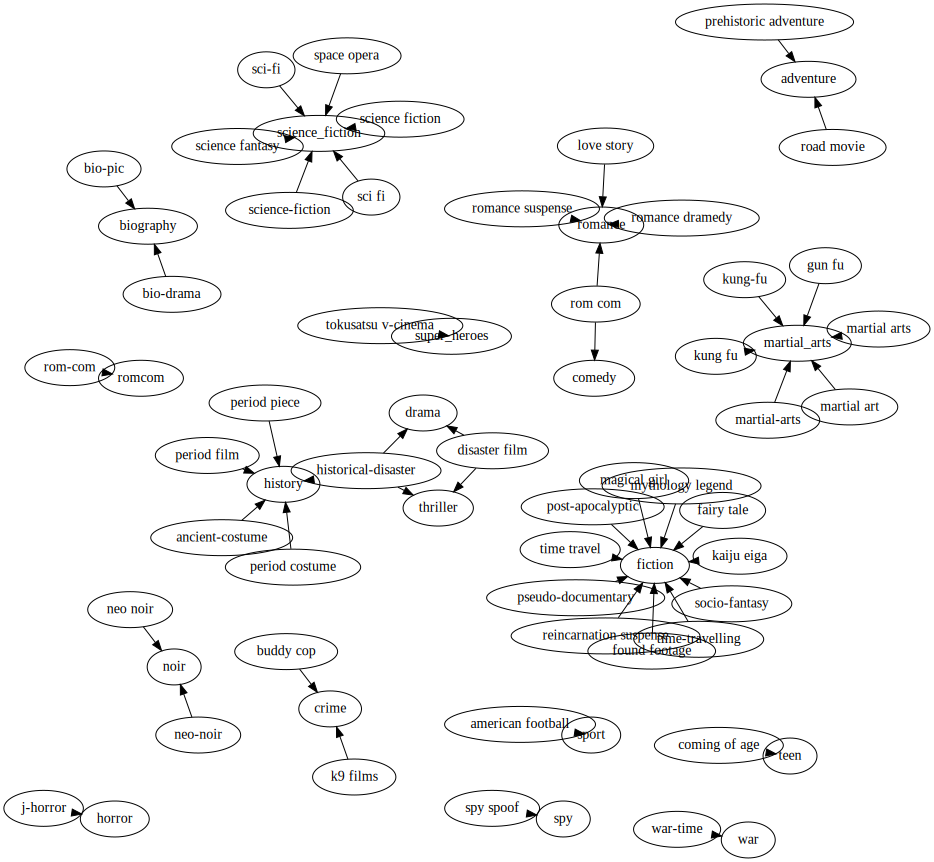

In [69]:
G_complex = pgv.AGraph(strict=True, directed=True)
G_complex.add_edges_from([
    ('neo noir', 'noir'),
    ('period film', 'history'),
    ('period costume', 'history'),
    ('period piece', 'history'),
    ('kung fu', 'martial_arts'),
    ('martial art', 'martial_arts'),
    ('gun fu', 'martial_arts'),
    ('martial arts', 'martial_arts'),
    ('prehistoric adventure', 'adventure'),
    ('road movie', 'adventure'),
    ('buddy cop', 'crime'),
    ('disaster film', 'drama'),
    ('time travel', 'fiction'),
    ('found footage', 'fiction'),
    ('magical girl', 'fiction'),
    ('fairy tale', 'fiction'),
    ('mythology legend', 'fiction'),
    ('reincarnation suspense', 'fiction'),
    ('kaiju eiga', 'fiction'),
    ('tokusatsu v-cinema', 'super_heroes'),
    ('science fantasy', 'science_fiction'),
    ('sci fi', 'science_fiction'),
    ('american football', 'sport'),
    ('space opera', 'science_fiction'),
    ('rom com', 'romance'),
    ('rom com', 'comedy'),
    ('love story', 'romance'),
    ('romance dramedy', 'romance'),
    ('love story', 'romance'),
    ('romance suspense', 'romance'),
    ('science fiction', 'science_fiction'),
    ('spy spoof', 'spy'),
    ('coming of age', 'teen'),
    ('disaster film', 'thriller'),
    ('historical-disaster', 'thriller'),
    ('rom-com', 'romcom'),
    ('neo-noir', 'noir'),
    ('j-horror', 'horror'),
    ('historical-disaster', 'history'),
    ('pseudo-documentary', 'fiction'),
    ('socio-fantasy', 'fiction'),
    ('historical-disaster', 'drama'),
    ('bio-pic', 'biography'),
    ('time-travelling', 'fiction'),
    ('post-apocalyptic', 'fiction'),
    ('bio-drama', 'biography'),
    ('ancient-costume', 'history'),
    ('kung-fu', 'martial_arts'),
    ('martial-arts', 'martial_arts'),
    ('sci-fi', 'science_fiction'),
    ('war-time', 'war'),
    ('science-fiction', 'science_fiction'),
    ('k9 films', 'crime'),
])
G_complex.layout()
G_complex.draw('example.png', format='png')
G_complex

In [70]:
def finder(G: pgv.AGraph, node):
    """
    Для графа G находим все листовые вершины для вершины node
    :Exception: -  Если граф содержит циклы
    """
    ret = set()
    visitedEdges = set()
    succesors = G.successors(node)
    if len(succesors) == 0:
        ret.add(node)
        return ret
    for q in succesors:
        newSuccesors = G.successors(q)
        if len(newSuccesors) == 0:
            # Получили цикл
            ret.add(q)
        else:
            for n in newSuccesors:
                if G.get_edge(q, n) in visitedEdges:
                    raise Exception('Граф содержит циклы')
                succesors.append(n)
                visitedEdges.add(G.get_edge(q, n))
    return ret

Найдем жанры для сложных графов

In [71]:
# список всех не листьев
vertexes = set()
for node in G_complex.nodes():
    if len(G_complex.successors(node)) != 0:
        vertexes.add(str(node))

In [72]:
newData = pd.DataFrame()
for index, row in data.iterrows():
    genreCorrected = row['GenreCorrected']
    res = set()
    for ver in vertexes:
        if genreCorrected.__contains__(ver):
            res.update(finder(G_complex, ver))

    row['GenreCorrected v2'] = ','.join(res)
    newData = newData.append(row, ignore_index=True)

In [73]:
assert newData.loc[7]['GenreCorrected'] == 'comedy'

Теперь найдем жанры для простых графов

In [74]:
#список всех вершин графа
vertexes = set()
for node in G_simple.nodes():
    vertexes.add(str(node))

In [75]:
newData1 = pd.DataFrame()
for index, row in newData.iterrows():
    genreCorrected = correctWithoutSor(str(row['GenreCorrected']).replace('-', ' ').replace('/', ' ').replace(',', ' ').replace('.', ' '), ' ').split(' ')
    res = set()
    for ver in vertexes:
        if ver in genreCorrected:
            res.update(finder(G_simple, ver))

    row['GenreCorrected v2'] = row['GenreCorrected v2'] + ','.join(res)
    newData1 = newData1.append(row, ignore_index=True)

In [76]:
data = newData1.copy()
data['GenreCorrected'] = data['GenreCorrected v2'].copy()
data = data.drop(columns=['GenreCorrected v2'])

In [77]:
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,unknown,
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,unknown,
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,unknown,
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,unknown,
4,1902.0,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter",unknown,


In [78]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

In [79]:
len(pd.Series(data['GenreCorrected'].unique()))

40

Получили 40 различных комбинации жанров

In [80]:
data.to_csv('movies_v2.csv')

### Очищаем актерский состав от жанров

In [81]:
# Список всех node деревьев
vertexes = set()
for node in G_complex.nodes():
    vertexes.add(str(node))
for node in G_simple.nodes():
    vertexes.add(str(node))

In [82]:
# Находим подозрительный список актеров
data1 = pd.DataFrame(columns=data.columns)

for index, row in data.iterrows():
    casts = set(correctWithoutSor(row['CastCorrected'], separator=',').split(','))
    castSuspicious = set()
    castTrue = set()

    for cast in casts:
        for genre in vertexes:
            if re.search('[^a-zA-Z]' + genre + '[^a-zA-Z]', ' ' + cast + ' '):
                castSuspicious.add(cast)

    if len(castSuspicious) > 0:
        row['CastSuspicious'] = ','.join(castSuspicious)
        row['castTrue'] = ','.join(casts - castSuspicious)
        data1 = data1.append(row)

print(data1.shape)
data1.head()

(1748, 13)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected,CastSuspicious,castTrue
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,unknown,,unknown,
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,unknown,,unknown,
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,unknown,,unknown,
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,unknown,,unknown,
4,1902.0,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter",unknown,,unknown,


In [83]:
assert data1.loc[7]['GenreCorrected'] == 'comedy'

In [84]:
data2 = pd.DataFrame(columns=data1.columns)
for index, row in data1.iterrows():
    casts = set(row['CastSuspicious'].split(','))
    trueCast = set(str(row['castTrue']).split(','))

    addToSet(casts, trueCast, 'the baja 1000 off-road race')
    addToSet(casts, trueCast, 'director: nick love cast: ray winstone')
    addToSet(casts, trueCast, 'sada thompson')
    addToSet(casts, trueCast, 'the dead end kids')
    addToSet(casts, trueCast, 'faizon love (voice)')
    addToSet(casts, trueCast, 'dorothy short')
    addToSet(casts, trueCast, 'bessie love.')
    addToSet(casts, trueCast, 'music by ranee lee')
    addToSet(casts, trueCast, 'the use of music against south africa under apartheid')
    addToSet(casts, trueCast, 'the east side kids')
    addToSet(casts, trueCast, 'alyson stoner')
    addToSet(casts, trueCast, 'ryan guzman briana evigan misha gabriel alyson stoner')
    addToSet(casts, trueCast, 'montagu love')
    addToSet(casts, trueCast, 'six months in the lives of five children with autism in los angeles')
    addToSet(casts, trueCast, 'susam tom and 11 children with disabilities')
    addToSet(casts, trueCast, 'ryan guzman briana evigan misha gabriel')
    addToSet(casts, trueCast, 'billy idol')
    addToSet(casts, trueCast, 'faizon love')
    addToSet(casts, trueCast, 'after a vicious attack leaves him brain-damaged and broke; mark hogancamp seeks recovery in "marwencol" a 1/6th scale world war ii-era town he creates in his backyard.')
    addToSet(casts, trueCast, 'columbus short')
    addToSet(casts, trueCast, 'drama based on a true story')
    addToSet(casts, trueCast, 'bessie love')
    addToSet(casts, trueCast, 'voices of martin short')
    addToSet(casts, trueCast, 'dead end kids')
    addToSet(casts, trueCast, 'martin short')
    addToSet(casts, trueCast, 'the murder of dilawar')
    addToSet(casts, trueCast, 'the children of prostitutes in india')
    addToSet(casts, trueCast, 'psy')
    addToSet(casts, trueCast, 'thriller manju')
    addToSet(casts, trueCast, 'courtney love')
    addToSet(casts, trueCast, 'music director- a r rahman')
    addToSet(casts, trueCast, 'jennifer love hewitt')
    addToSet(casts, trueCast, 'early pioneers of the hardcore punk music scene')
    addToSet(casts, trueCast, 'fidelity and a suburban family')
    addToSet(casts, trueCast, 'east side kids')

    row['castTrue'] = ','.join(trueCast)
    row['CastSuspicious'] = ','.join(casts - trueCast)

    data2 = data2.append(row)

In [85]:
data2['GenreCorrected'] = data2['GenreCorrected'] + "," + data2['CastSuspicious']
data2['CastCorrected'] = data2['CastCorrected'] + ',' + data2['castTrue']
data2 = data2.drop(columns=['CastSuspicious', 'castTrue'])

In [86]:
for i in data2.index:
    data.loc[i] = data2.loc[i]

In [87]:
data.shape

(33868, 11)

In [88]:
assert data.loc[7]['GenreCorrected'].__contains__('comedy')
assert data.loc[7]['GenreCorrected'] == 'comedy,unknown'

### Очищаем режиссеров от жанров

In [89]:
# Находим подозрительный список актеров
data1 = pd.DataFrame(columns=data.columns)

for index, row in data.iterrows():
    casts = set(correctWithoutSor(row['DirectorCorrected'], separator=',').split(','))
    castSuspicious = set()
    castTrue = set()

    for cast in casts:
        for genre in vertexes:
            if re.search('[^a-zA-Z]' + genre + '[^a-zA-Z]', ' ' + cast + ' '):
                castSuspicious.add(cast)

    if len(castSuspicious) > 0:
        row['DirectorSuspicious'] = ','.join(castSuspicious)
        row['DirectorTrue'] = ','.join(casts - castSuspicious)
        data1 = data1.append(row)

data1.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected,DirectorSuspicious,DirectorTrue
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,"unknown,",",unknown",unknown,
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,"unknown,",",unknown",unknown,
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,"unknown,",",unknown",unknown,
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,"unknown,",",unknown",unknown,
14,1907.0,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...,unknown,"unknown,","comedy,unknown",unknown,


In [90]:
correction = data1.loc[32210]
correction

Release Year                                                     2010.0
Title                                                    Цветок дьявола
Origin/Ethnicity                                                Russian
Director                                               Romantic fantasy
Cast                                                            unknown
Genre                 olga khokhlova, sergey krapiventsev, oleg suka...
Wiki Page             https://en.wikipedia.org/wiki/The_Devil%27s_Fl...
Plot                  The main heroine of the picture Polina is purs...
DirectorCorrected                                      romantic fantasy
CastCorrected                                                  unknown,
GenreCorrected                                                 ,unknown
DirectorSuspicious                                     romantic fantasy
DirectorTrue                                                           
Name: 32210, dtype: object

Столбец режиссеров содержит в себе жанр только в одном случае, изменим его вручную

In [91]:
correction = data.loc[32210]
correction['GenreCorrected'] = 'romantic,fantasy'
data.loc[32210] = correction
data.loc[32210]

Release Year                                                    2010.0
Title                                                   Цветок дьявола
Origin/Ethnicity                                               Russian
Director                                              Romantic fantasy
Cast                                                           unknown
Genre                olga khokhlova, sergey krapiventsev, oleg suka...
Wiki Page            https://en.wikipedia.org/wiki/The_Devil%27s_Fl...
Plot                 The main heroine of the picture Polina is purs...
DirectorCorrected                                     romantic fantasy
CastCorrected                                                 unknown,
GenreCorrected                                        romantic,fantasy
Name: 32210, dtype: object

In [92]:
data['GenreCorrected']

0         ,unknown
1         ,unknown
2         ,unknown
3         ,unknown
4         ,unknown
           ...    
33863     ,unknown
33864     ,unknown
33865     ,unknown
33866     ,unknown
33867     ,unknown
Name: GenreCorrected, Length: 33868, dtype: object

In [93]:
assert data.loc[7]['GenreCorrected'].__contains__('comedy')
assert data.loc[7]['GenreCorrected'] == 'comedy,unknown'

### Удаление мусора из актерского состава и режиссеров
Там осталось много мусора. Можно посмотреть можно ли с этим что-то сделать

In [94]:
data.to_csv("1.csv")

### Теперь исправим

#### Сначала очистим актерский состав

Переводим ищ актеров в режиссеры

In [95]:
def directorProfessionToDirector(row:str):
    return str(row).replace('screenplay','director').replace('writer','director').replace('producer','director').replace('screeplay','director').replace('director/director','director').replace('director, director','director').replace('director,director','director')
data['CastCorrected'] = data['CastCorrected'].apply(directorProfessionToDirector)

In [96]:
tempData = search(data, 'CastCorrected', '^directors*:', useRegex=True)
tempData.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
20456,2011.0,The Mirror Boy,British,Director: Obi Emelonye,"Director: Obi Emelonye Cast: Genevieve Nnaji, ...",unknown,https://en.wikipedia.org/wiki/The_Mirror_Boy,The film tells the uplifting story of a young ...,director: obi emelonye,"director: obi emelonye cast: genevieve nnaji, ...",
20457,2011.0,Tyrannosaur,British,Director: Paddy Considine,"Director: Paddy Considine Cast: Peter Mullan, ...",unknown,https://en.wikipedia.org/wiki/Tyrannosaur_(film),"One night, unemployed widower, Joseph, drunken...",director: paddy considine,"director: paddy considine cast: peter mullan, ...",
20458,2011.0,Late Bloomers,British,Director: Julie Gavras,"Director: Julie Gavras Cast: William Hurt, Isa...",unknown,https://en.wikipedia.org/wiki/Late_Bloomers_(2...,"A couple, Adam (William Hurt) and Mary (Isabel...",director: julie gavras,"director: julie gavras cast: william hurt, isa...",
20459,2011.0,Chalet Girl,British,Director: Phil Traill,"Director: Phil Traill Cast: Felicity Jones, Ed...",unknown,https://en.wikipedia.org/wiki/Chalet_Girl,Kim Mathews (Felicity Jones) is introduced by ...,director: phil traill,"director: phil traill cast: felicity jones, ed...",
20460,2011.0,Ironclad,British,Director: Jonathan English,Director: Jonathan English Cast: Paul Giamatti...,unknown,https://en.wikipedia.org/wiki/Ironclad_(film),A prologue describes how the barons of England...,director: jonathan english,director: jonathan english cast: paul giamatti...,


Удалили с начала строки 'directors:' или 'director:'

In [97]:
for index, row in tempData.iterrows():
    casts = row['CastCorrected']
    casts = casts.split('cast')
    directors = casts[0]
    directors = directors.replace('directors:', '').replace('director:', '').split(',')
    row['DirectorCorrected'] = str(row['DirectorCorrected']) + ',' + ','.join(directors)
    if len(casts) > 1:
        row['CastCorrected'] = casts[1]
    else:
        row['CastCorrected'] = ''
    tempData.loc[index] = row

In [98]:
assert not tempData.iloc[0]['CastCorrected'].__contains__('director')

In [99]:
data = data.drop(index=tempData.index)
data = data.append(tempData, ignore_index=True)
assert data.shape[0] == 33868
data

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,"unknown,",",unknown"
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,"unknown,",",unknown"
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,"unknown,",",unknown"
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,"unknown,",",unknown"
4,1902.0,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter","unknown,",",unknown"
...,...,...,...,...,...,...,...,...,...,...,...
33863,2014.0,The Two Faces of January,"British,American","Director: Hossein Amini,Hossein Amini","Director: Hossein Amini Cast: Viggo Mortensen,...","unknown,thriller",https://en.wikipedia.org/wiki/The_Two_Faces_of...,"In 1962, con man Chester MacFarland and his wi...","director: hossein amini,hossein amini, hossein...",": viggo mortensen,kirsten dunst,viggo mortense...",
33864,2017.0,The Zookeeper's Wife,"British,American","Director: Niki Caro,Niki Caro","Johan Heldenbergh,Michael McElhatton,Director:...","unknown,war,drama",https://en.wikipedia.org/wiki/The_Zookeeper%27...,Dr. Jan Żabiński (Johan Heldenbergh) and his w...,"director: niki caro,niki caro, niki caro",": jessica chastain,daniel brühl,johan heldenbe...",
33865,2011.0,Third Contact,British,Director: Simon Horrocks,"Director: Simon Horrocks,Oliver Browne,Directo...",unknown,https://en.wikipedia.org/wiki/Third_Contact,"Psychotherapist, Dr David Wright is in a sessi...","director: simon horrocks, simon horrocks tim s...",,
33866,2017.0,Victoria & Abdul,"British,American","Director: Stephen Frears,Stephen Frears","Tim Pigott-Smith,Director: Stephen Frears Cast...","unknown,biography,drama",https://en.wikipedia.org/wiki/Victoria_%26_Abdul,"Abdul Karim, a young prison clerk from Agra, I...","director: stephen frears,stephen frears, steph...",": judi dench,stephen frears (director); lee ha...",


In [100]:
assert data.loc[7]['GenreCorrected'].__contains__('comedy')
assert data.loc[7]['GenreCorrected'] == 'comedy,unknown'

In [101]:
tempData = search(data, 'CastCorrected', 'director', useRegex=False)
tempData

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
13341,2000.0,Book of Shadows: Blair Witch 2,American,Joe Berlinger,"Kim Director, Jeffrey Donovan, Erica Leerhsen",horror,https://en.wikipedia.org/wiki/Book_of_Shadows:...,"In November 1999, tourists and fans of The Bla...",joe berlinger,"kim director, jeffrey donovan, erica leerhsen",horror
16716,2017.0,Underworld: Blood Wars,American,Anna Foerster,Anna Foerster (director); Cory Goodman (screen...,"action, horror",https://en.wikipedia.org/wiki/Underworld:_Bloo...,The remaining vampire covens are on the verge ...,anna foerster,anna foerster (director); cory goodman (direct...,
16717,2017.0,Monster Trucks,American,Chris Wedge,"Chris Wedge (director); Jonathan Aibel, Glenn ...","animation, adventure, sci-fi",https://en.wikipedia.org/wiki/Monster_Trucks_(...,Terravex Oil is in the midst of a fracking ope...,chris wedge,"chris wedge (director); jonathan aibel, glenn ...",science_fiction
16718,2017.0,The Bye Bye Man,American,Stacy Title,Stacy Title (director); Jonathan Penner (scree...,horror,https://en.wikipedia.org/wiki/The_Bye_Bye_Man,"In 1969, a mass murder occurs in which a man k...",stacy title,stacy title (director); jonathan penner (direc...,horror
16719,2017.0,Sleepless,American,Baran bo Odar,Baran bo Odar (director); Andrea Berloff (scre...,"action, thriller",https://en.wikipedia.org/wiki/Sleepless_(2017_...,"In Las Vegas, vice LVMPD policemen Vincent Dow...",baran bo odar,baran bo odar (director); andrea berloff (dire...,
...,...,...,...,...,...,...,...,...,...,...,...
33610,2013.0,Nymphomaniac,British,Director: Lars von Trier,Director: Lars von Trier Cast: Charlotte Gains...,unknown,https://en.wikipedia.org/wiki/Nymphomaniac_(film),"On a snowy evening, middle-aged bachelor Selig...","director: lars von trier, lars von trier",": charlotte gainsbourg, stellan skarsgård, sta...",",christian slater"
33853,2017.0,Goodbye Christopher Robin,"British,American","Simon Curtis,Director: Simon Curtis","Kelly Macdonald,Alex Lawther,Margot Robbie,Sim...","unknown,biographical,drama",https://en.wikipedia.org/wiki/Goodbye_Christop...,"The film begins during WWII in 1941, with Alan...","simon curtis,director: simon curtis, simon cur...",": domhnall gleeson,margot robbie,will tilston,...",
33864,2017.0,The Zookeeper's Wife,"British,American","Director: Niki Caro,Niki Caro","Johan Heldenbergh,Michael McElhatton,Director:...","unknown,war,drama",https://en.wikipedia.org/wiki/The_Zookeeper%27...,Dr. Jan Żabiński (Johan Heldenbergh) and his w...,"director: niki caro,niki caro, niki caro",": jessica chastain,daniel brühl,johan heldenbe...",
33866,2017.0,Victoria & Abdul,"British,American","Director: Stephen Frears,Stephen Frears","Tim Pigott-Smith,Director: Stephen Frears Cast...","unknown,biography,drama",https://en.wikipedia.org/wiki/Victoria_%26_Abdul,"Abdul Karim, a young prison clerk from Agra, I...","director: stephen frears,stephen frears, steph...",": judi dench,stephen frears (director); lee ha...",


In [102]:
for index, row in tempData.iterrows():
    casts = row['CastCorrected'].replace(';',',').split(',')
    notDirector = set()
    for cast in casts:
        if cast.__contains__('director'):
            row['DirectorCorrected'] = row['DirectorCorrected'] + ',' + cast.replace('director','')
        else:
            notDirector.add(cast)
    row['CastCorrected'] = ','.join(notDirector)
    tempData.loc[index] = row

In [103]:
assert not tempData.iloc[0]['CastCorrected'].__contains__('director')

In [104]:
data = data.drop(index=tempData.index)
data = data.append(tempData, ignore_index=True)
assert data.shape[0] == 33868
data

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,"unknown,",",unknown"
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,"unknown,",",unknown"
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,"unknown,",",unknown"
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,"unknown,",",unknown"
4,1902.0,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter","unknown,",",unknown"
...,...,...,...,...,...,...,...,...,...,...,...
33863,2013.0,Nymphomaniac,British,Director: Lars von Trier,Director: Lars von Trier Cast: Charlotte Gains...,unknown,https://en.wikipedia.org/wiki/Nymphomaniac_(film),"On a snowy evening, middle-aged bachelor Selig...","director: lars von trier, lars von trier ,: la...","jean-marc barr,udo kier, uma thurman,uma thur...",",christian slater"
33864,2017.0,Goodbye Christopher Robin,"British,American","Simon Curtis,Director: Simon Curtis","Kelly Macdonald,Alex Lawther,Margot Robbie,Sim...","unknown,biographical,drama",https://en.wikipedia.org/wiki/Goodbye_Christop...,"The film begins during WWII in 1941, with Alan...","simon curtis,director: simon curtis, simon cur...","margot robbie,will tilston,alex lawther,kelly ...",
33865,2017.0,The Zookeeper's Wife,"British,American","Director: Niki Caro,Niki Caro","Johan Heldenbergh,Michael McElhatton,Director:...","unknown,war,drama",https://en.wikipedia.org/wiki/The_Zookeeper%27...,Dr. Jan Żabiński (Johan Heldenbergh) and his w...,"director: niki caro,niki caro, niki caro ,niki...","jessica chastain,daniel brühl,johan heldenber...",
33866,2017.0,Victoria & Abdul,"British,American","Director: Stephen Frears,Stephen Frears","Tim Pigott-Smith,Director: Stephen Frears Cast...","unknown,biography,drama",https://en.wikipedia.org/wiki/Victoria_%26_Abdul,"Abdul Karim, a young prison clerk from Agra, I...","director: stephen frears,stephen frears, steph...","eddie izzard, judi dench,olivia williams,adeel...",


In [105]:
assert data.loc[7]['GenreCorrected'].__contains__('comedy')
assert data.loc[7]['GenreCorrected'] == 'comedy,unknown'

Bеперь избавимся от 'voice'

In [106]:
data['CastCorrected'] = data['CastCorrected'].apply(lambda x:  x.replace('voices', '').replace('voice', ''))

теперь от скобочек

In [107]:
tempData = search(data, 'CastCorrected', '(', useRegex=False)
tempData

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
1997,1936.0,Anthony Adverse,American,Mervyn LeRoy,"Fredric March, Olivia de Havilland, Donald Woo...","drama, romance",https://en.wikipedia.org/wiki/Anthony_Adverse,"In 1773, young English beauty Maria Bonnyfeath...",mervyn leroy,"fredric march, olivia de havilland, donald woo...",
2020,1936.0,Come and Get It,American,"Howard Hawks, William Wyler","Edward Arnold, Joel McCrea, Frances Farmer, Wa...",drama,https://en.wikipedia.org/wiki/Come_and_Get_It_...,Ruthless lumberjack foreman Barney Glasgow (Ed...,"howard hawks, william wyler","edward arnold, joel mccrea, frances farmer, wa...",drama
2028,1936.0,Dodsworth,American,William Wyler Best Director nominee,"Walter Huston (Best Actor nominee), Ruth Chatt...",drama,https://en.wikipedia.org/wiki/Dodsworth_(film),"In the Midwestern town of Zenith, Samuel ""Sam""...",william wyler best director nominee,"walter huston (best actor nominee), ruth chatt...",drama
2049,1936.0,The Great Ziegfeld,American,Robert Z. Leonard Best Director nominee,"William Powell, Myrna Loy, Luise Rainer (Acade...",musical biography,https://en.wikipedia.org/wiki/The_Great_Ziegfeld,"The son of a highly respected music professor,...",robert z. leonard best director nominee,"william powell, myrna loy, luise rainer (acade...",
2079,1936.0,Mr. Deeds Goes to Town,American,Frank Capra Academy Award for Best Director,"Gary Cooper (Best Actor nominee), Jean Arthur,...","comedy, romance",https://en.wikipedia.org/wiki/Mr._Deeds_Goes_t...,"During the Great Depression, Longfellow Deeds ...",frank capra academy award for best director,"gary cooper (best actor nominee), jean arthur,...",
...,...,...,...,...,...,...,...,...,...,...,...
32869,1991.0,"Beauty and the Beast,Beauty and the Beast 3D",American,"Kirk Wise,Gary Trousdale","Rex Everhart,Richard White,David Ogden Stiers,...","animated,fantasy,family",NaN,"One winter's night, an enchantress disguised a...","kirk wise,gary trousdale","angela lansbury,robby benson,paige o'hara,rex ...",
33382,2017.0,Don't Take Me Home,British,Director: Jonny Owen,"Director: Jonny Owen Cast: Gareth Bale, Chris ...",unknown,https://en.wikipedia.org/wiki/Don%27t_Take_Me_...,The film recounts the saga of Wales national f...,"director: jonny owen, jonny owen",": gareth bale, chris coleman, aaron ramsey, ga...",
33504,2017.0,Born in China,American,Lu Chuan,Lu Chuan (director); David Fowler (screenplay)...,documentary,https://en.wikipedia.org/wiki/Born_in_China,This documentary follows four individual anima...,"lu chuan,lu chuan (), david fowler ()","zhou xun (narrator), john krasinski",documentary
33523,2017.0,War Machine,American,David Michôd,David Michôd (director/screenplay); Michael Ha...,"comedy, drama, war",https://en.wikipedia.org/wiki/War_Machine_(film),"In the summer of 2009, four-star General Glen ...","david michôd,david michôd ()","lakeith stanfield, rj cyler, anthony michael ...",


In [108]:
for index, row in tempData.iterrows():
    casts = row['CastCorrected'].split(',')
    normalCast = set()
    for cast in casts:
        if cast.__contains__('('):
            row['DirectorCorrected'] = row['DirectorCorrected'] + ',' +re.sub('\([\d\w ]*\)', '', cast)
        else:
            normalCast.add(cast)
    row['CastCorrected'] = ','.join(normalCast)
    tempData.loc[index] = row

In [109]:
data = data.drop(index=tempData.index)
data = data.append(tempData, ignore_index=True)
assert data.shape[0] == 33868
data

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,"unknown,",",unknown"
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,"unknown,",",unknown"
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,"unknown,",",unknown"
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,"unknown,",",unknown"
4,1902.0,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter","unknown,",",unknown"
...,...,...,...,...,...,...,...,...,...,...,...
33863,1991.0,"Beauty and the Beast,Beauty and the Beast 3D",American,"Kirk Wise,Gary Trousdale","Rex Everhart,Richard White,David Ogden Stiers,...","animated,fantasy,family",NaN,"One winter's night, an enchantress disguised a...","kirk wise,gary trousdale,angela lansbury","angela lansbury,robby benson,hal smith,paige o...",
33864,2017.0,Don't Take Me Home,British,Director: Jonny Owen,"Director: Jonny Owen Cast: Gareth Bale, Chris ...",unknown,https://en.wikipedia.org/wiki/Don%27t_Take_Me_...,The film recounts the saga of Wales national f...,"director: jonny owen, jonny owen , gary speed",": gareth bale, chris coleman, aaron ramsey, as...",
33865,2017.0,Born in China,American,Lu Chuan,Lu Chuan (director); David Fowler (screenplay)...,documentary,https://en.wikipedia.org/wiki/Born_in_China,This documentary follows four individual anima...,"lu chuan,lu chuan (), david fowler (), zhou xun",john krasinski,documentary
33866,2017.0,War Machine,American,David Michôd,David Michôd (director/screenplay); Michael Ha...,"comedy, drama, war",https://en.wikipedia.org/wiki/War_Machine_(film),"In the summer of 2009, four-star General Glen ...","david michôd,david michôd (), michael hastings","anthony michael hall, tilda swinton, alan ruc...",


#### Теперь почистим режиссеров

director: ... cast:

In [110]:
tempData = search(data, 'DirectorCorrected', 'cast:', useRegex=False)
tempData

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
33612,2016.0,100 Streets,"British,American","Jim O'Hanlon,Director: Jim O'Hanlon","Tom Cullen,Director: Jim O'Hanlon Cast: Idris ...","unknown,drama",https://en.wikipedia.org/wiki/100_Streets,The film centers on three characters who have ...,"director: jim o'hanlon,jim o'hanlon,jim o'hanl...","franz drameh,ken stott,tom cullen,charlie cree...",
33613,2013.0,12 Years a Slave,"British,American","Steve McQueen,Director: Steve McQueen","Benedict Cumberbatch,Chiwetel Ejiofor,Sarah Pa...","unknown,drama",https://en.wikipedia.org/wiki/12_Years_a_Slave...,"In 1841, Solomon Northup is a free African-Ame...","steve mcqueen,director: steve mcqueen,: steve ...","lupita nyong'o,benedict cumberbatch,michael fa...",
33615,2017.0,47 Meters Down,"British,American","Johannes Roberts,Director: Johannes Roberts","Director: Johannes Roberts Cast: Claire Holt,Y...","horror,unknown",https://en.wikipedia.org/wiki/47_Meters_Down,Lisa (Mandy Moore) and Kate (Claire Holt) are ...,"johannes roberts,director: johannes roberts,: ...","yani gellman,matthew modine,santiago segura, j...",
33616,2011.0,A Dangerous Method,"Canadian,British","Director: David Cronenberg,David Cronenberg",Director: David Cronenberg Cast: Keira Knightl...,"unknown,historical/drama",https://en.wikipedia.org/wiki/A_Dangerous_Method,"In August 1904, Sabina Spielrein arrives at th...","david cronenberg,director: david cronenberg,: ...","michael fassbender,viggo mortensen,keira knigh...",
33617,2011.0,A Few Best Men,"Australian,British","Director: Stephan Elliott,Stephan Elliott","Laura Brent,Kevin Bishop,Kris Marshall,Directo...","unknown,comedy",https://en.wikipedia.org/wiki/A_Few_Best_Men,When David Locking (Samuel) proposes to his gi...,"stephan elliott,director: stephan elliott,: st...","kevin bishop,rebel wilson,kris marshall,laura ...",
...,...,...,...,...,...,...,...,...,...,...,...
33739,2010.0,"Perfect Sense,The Last Word",British,"David Mackenzie,Director: David Mackenzie","Eva Green,Ewan McGregor,Director: David Macken...",unknown,NaN,An epidemic begins to spread throughout the gl...,"director: david mackenzie,david mackenzie,: da...","eva green,ewan mcgregor",
33740,2012.0,"The Expatriate,Erased","British,American","Philipp Stölzl,Director: Philipp Stölzl","Aaron Eckhart,Liana Liberato,Director: Philipp...","unknown,thriller",NaN,Ben Logan is an American single parent who has...,"director: philipp stölzl,philipp stölzl,: phil...","olga kurylenko,aaron eckhart,liana liberato,ga...",
33741,2014.0,"The Woman in Black: Angel of Death,The Woman i...","British,American","Director: Tom Harper,Tom Harper","Ned Dennehy,Helen McCrory,Jeremy Irvine,Adrian...","horror,unknown",NaN,Forty years after the events of the first film...,"tom harper,director: tom harper,: tom harper c...","helen mccrory,jeremy irvine,adrian rawlins,lea...",
33742,2011.0,"Gnomeo and Juliet,Gnomeo & Juliet","British,American","Director: Kelly Asbury,Kelly Asbury","Emily Blunt,Jason Statham,James McAvoy,Richard...","animated,unknown,family",NaN,"In Stratford-Upon-Avon, Miss. Montague (blue) ...","director: kelly asbury,kelly asbury,: kelly as...","ashley jensen,james mcavoy,ozzy osbourne,hulk ...",


In [111]:
for index, row in tempData.iterrows():
    directors = row['DirectorCorrected']
    directors = directors.split('cast:')
    casts = directors[1]
    directors = directors[0]
    row['DirectorCorrected'] = directors
    row['CastCorrected'] = row['CastCorrected'] + ',' + casts

In [112]:
data = data.drop(index=tempData.index)
data = data.append(tempData, ignore_index=True)
assert data.shape[0] == 33868
data

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,"unknown,",",unknown"
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,"unknown,",",unknown"
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,"unknown,",",unknown"
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,"unknown,",",unknown"
4,1902.0,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter","unknown,",",unknown"
...,...,...,...,...,...,...,...,...,...,...,...
33863,2010.0,"Perfect Sense,The Last Word",British,"David Mackenzie,Director: David Mackenzie","Eva Green,Ewan McGregor,Director: David Macken...",unknown,NaN,An epidemic begins to spread throughout the gl...,"director: david mackenzie,david mackenzie,: da...","eva green,ewan mcgregor",
33864,2012.0,"The Expatriate,Erased","British,American","Philipp Stölzl,Director: Philipp Stölzl","Aaron Eckhart,Liana Liberato,Director: Philipp...","unknown,thriller",NaN,Ben Logan is an American single parent who has...,"director: philipp stölzl,philipp stölzl,: phil...","olga kurylenko,aaron eckhart,liana liberato,ga...",
33865,2014.0,"The Woman in Black: Angel of Death,The Woman i...","British,American","Director: Tom Harper,Tom Harper","Ned Dennehy,Helen McCrory,Jeremy Irvine,Adrian...","horror,unknown",NaN,Forty years after the events of the first film...,"tom harper,director: tom harper,: tom harper c...","helen mccrory,jeremy irvine,adrian rawlins,lea...",
33866,2011.0,"Gnomeo and Juliet,Gnomeo & Juliet","British,American","Director: Kelly Asbury,Kelly Asbury","Emily Blunt,Jason Statham,James McAvoy,Richard...","animated,unknown,family",NaN,"In Stratford-Upon-Avon, Miss. Montague (blue) ...","director: kelly asbury,kelly asbury,: kelly as...","ashley jensen,james mcavoy,ozzy osbourne,hulk ...",


In [113]:
data['DirectorCorrected'] = data['DirectorCorrected'].apply(lambda x: str(x).replace('director:', ''))
data['DirectorCorrected'] = data['DirectorCorrected'].apply(lambda x: str(x).replace('directors:', ''))

Теперь уберем цифры

In [114]:
data['CastCorrected'] = data['CastCorrected'].apply(lambda x : x.replace('cast:', ''))

In [115]:
def removeTrash(row:str):
    row = re.sub('[0-9]+', '', row)

    row = row.replace('&',',')
    row = row.replace(';',',')
    row = row.replace(':',',')

    row = re.sub('\[[a-z \-]*\]', '', row)
    row = re.sub('\([a-z \-]*\)', '', row)
    row = re.sub('-+', '-', row)

    return row

In [116]:
data['DirectorCorrected'] = data['DirectorCorrected'].apply(removeTrash)
data['CastCorrected'] = data['CastCorrected'].apply(removeTrash)

### Финальные правки

In [117]:
data['DirectorCorrected'] = data['DirectorCorrected'].apply(correctWithSor)
data['CastCorrected'] = data['CastCorrected'].apply(correctWithSor)
data['GenreCorrected'] = data['GenreCorrected'].apply(correctWithSor)